# Credit card dimension reduction 

In [314]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import FastICA, PCA
from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score
import numpy as np
import matplotlib.pyplot as plt # for data visualization
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
from sklearn.cluster import KMeans
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style

In [315]:
CC_df = pd.read_csv('../Data/CC_Feature_engineered.csv')

In [316]:
CC_df = CC_df.sample(10000, random_state = 2)
CC_df.to_csv('../Data/CC_df_sampled.csv', index = False)

X_train, X_final_test = train_test_split(CC_df,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_test = train_test_split(X_train,test_size=0.2, random_state= 2)
X_train.to_csv('../Data/CC_df_train.csv', index = False)
X_test.to_csv('../Data/CC_df_validation.csv', index = False)
print('records in training dataset')
print(len(X_train))
print('records in validation dataset')
print(len(X_test))
print('records in final testing dataset')
print(len(X_final_test))

records in training dataset
6400
records in validation dataset
1600
records in final testing dataset
2000


### PCA

In [317]:
X = X_train.drop(['approved', 'user_id'], axis = 1)

In [320]:
pca.explained_variance_ratio_

array([9.99976707e-01, 2.15000039e-05, 9.82530690e-07, 1.10086336e-07,
       9.25382308e-08, 5.53031717e-08, 4.67134546e-08, 4.03195888e-08,
       3.80346868e-08, 3.72246296e-08])

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

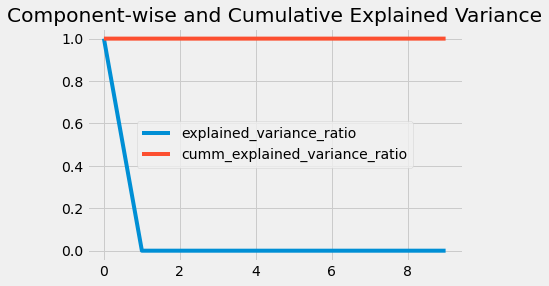

In [319]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X.values)
plt.plot(range(10), pca.explained_variance_ratio_, label = 'explained_variance_ratio')
plt.plot(range(10), np.cumsum(pca.explained_variance_ratio_), label = 'cumm_explained_variance_ratio')
leg = plt.legend(loc='center')
plt.title("Component-wise and Cumulative Explained Variance")
## PCA: choose to have 1 component

In [106]:
pca.explained_variance_

array([6.89847063e+06, 1.51538765e+02, 6.46276214e+00, 7.43352772e-01,
       6.02446227e-01, 3.55200718e-01, 3.11470845e-01, 2.62439737e-01,
       2.40767087e-01, 2.36152643e-01])

In [107]:
pca = PCA(n_components=1, random_state=2)
pca_df = pd.DataFrame(pca.fit_transform(X), columns = ['pc1'])
pca_df.head()

,pc1
0,-548.135358
1,-548.138988
2,-548.131635
3,2907.864308
4,-548.139854


#### Clustering the PCA transformed new data 

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


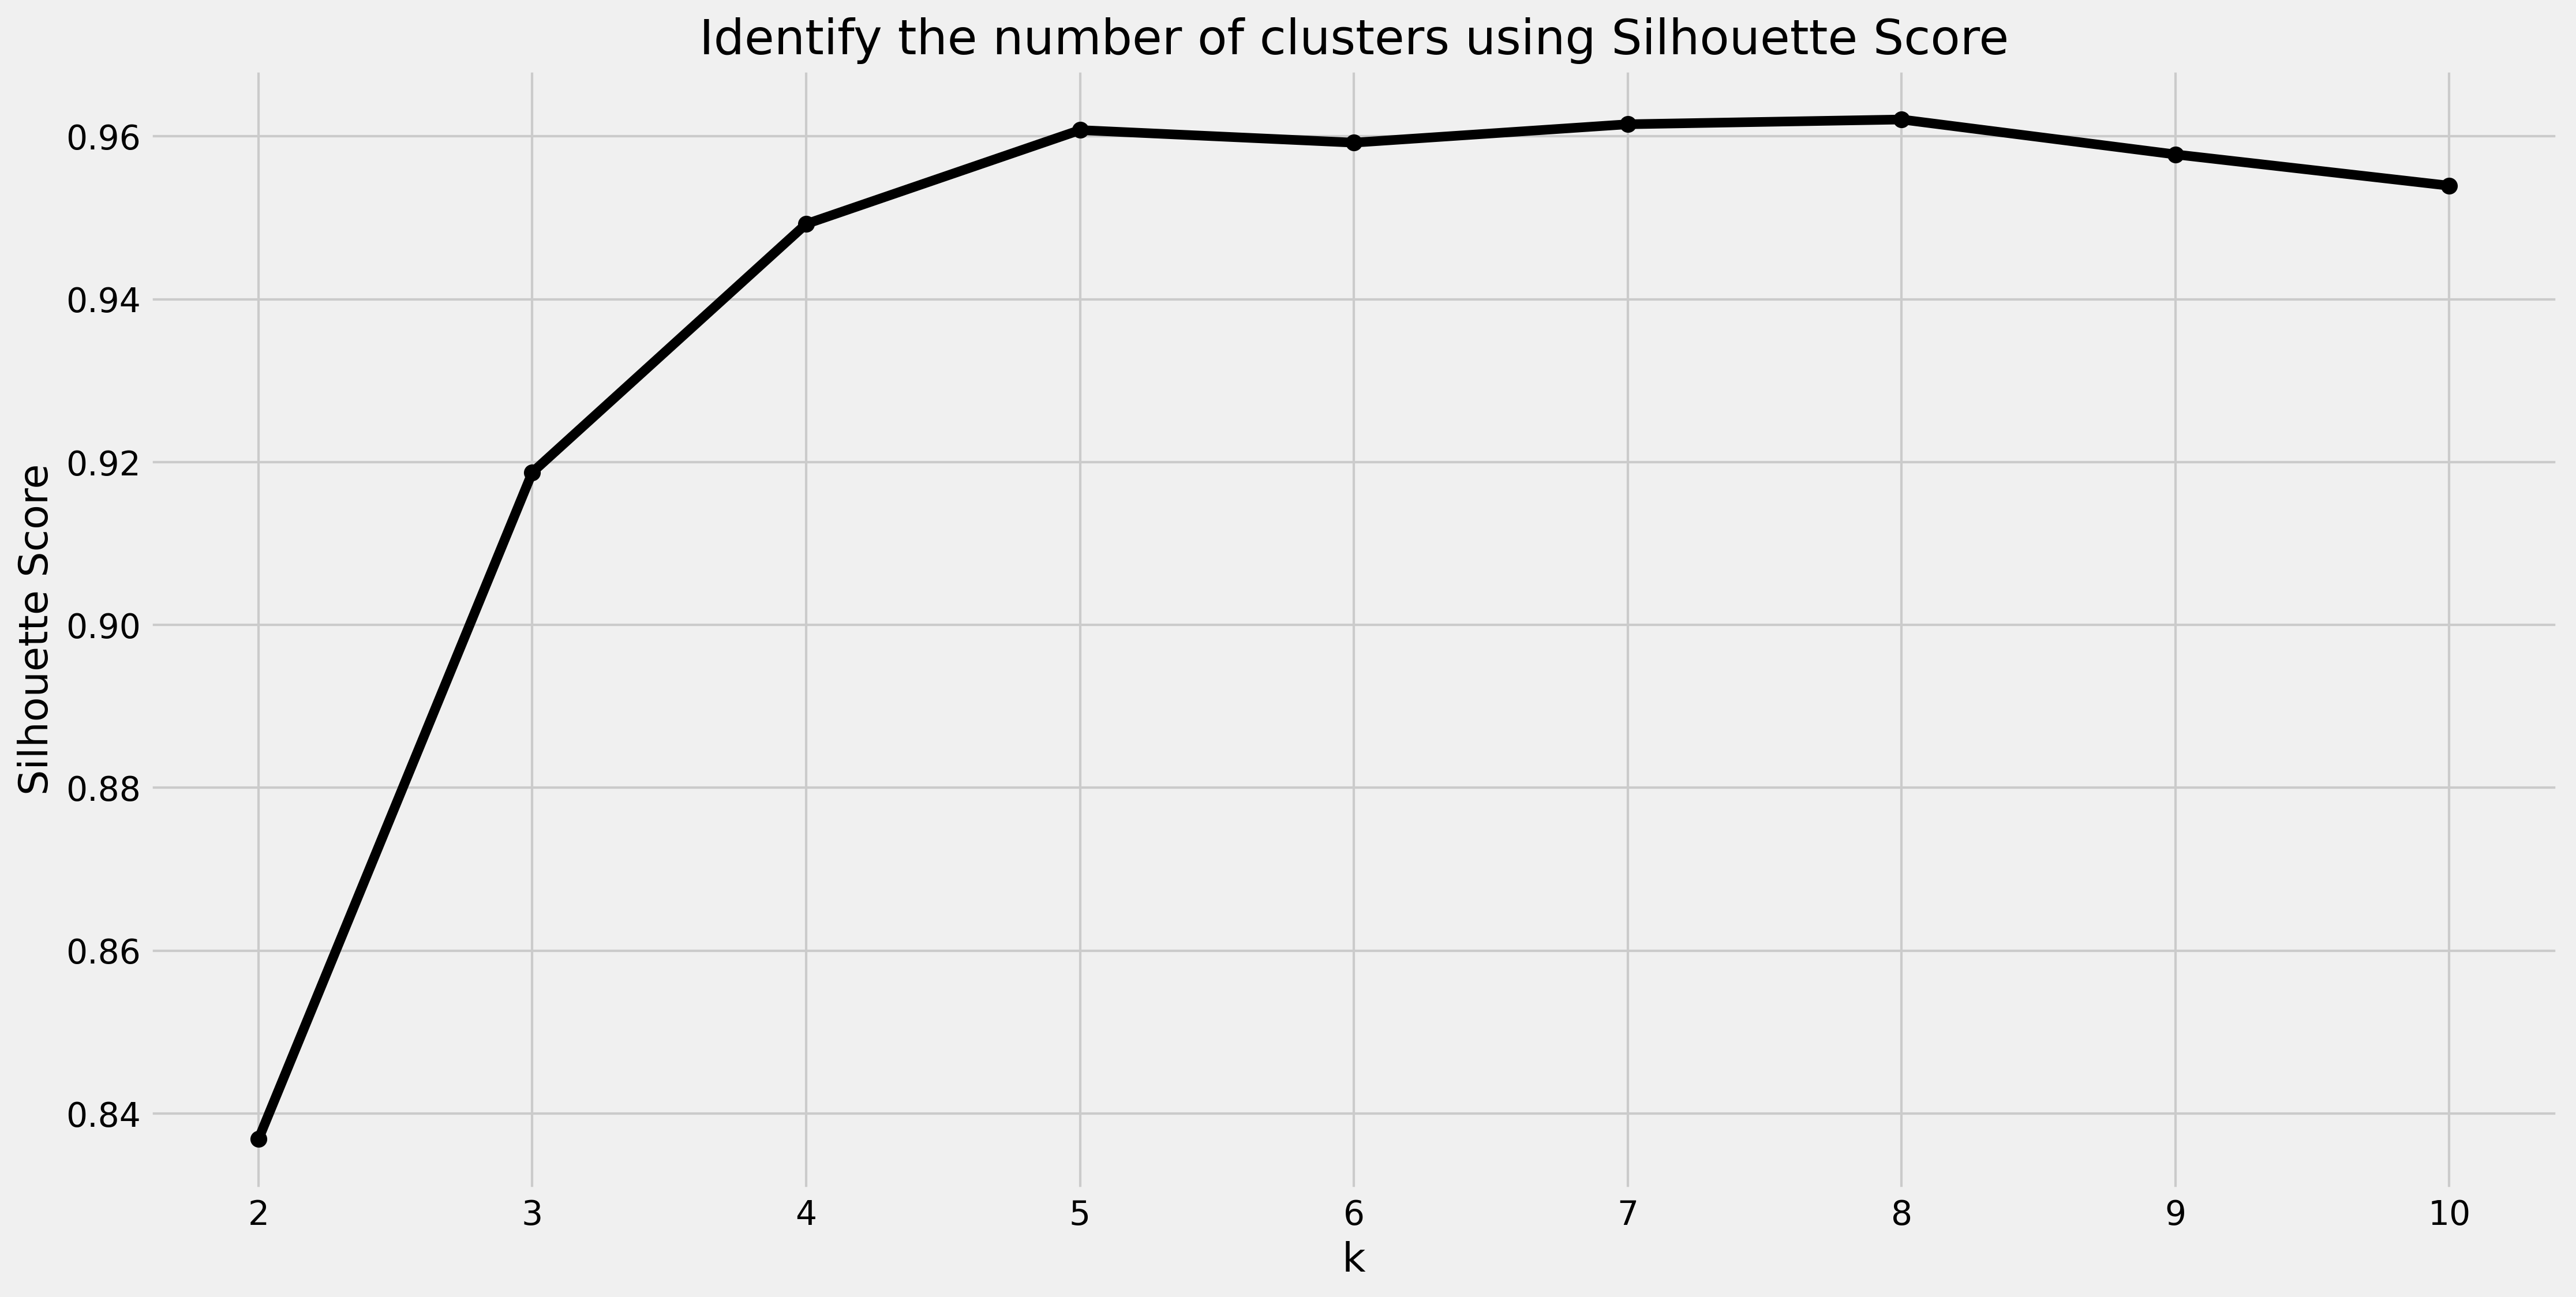

In [283]:
## GMM
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model

X = X_train.drop(['approved', 'user_id'], axis = 1)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(pca_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(pca_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

GMM should choose 5 clusters

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  app.launch_new_instance()


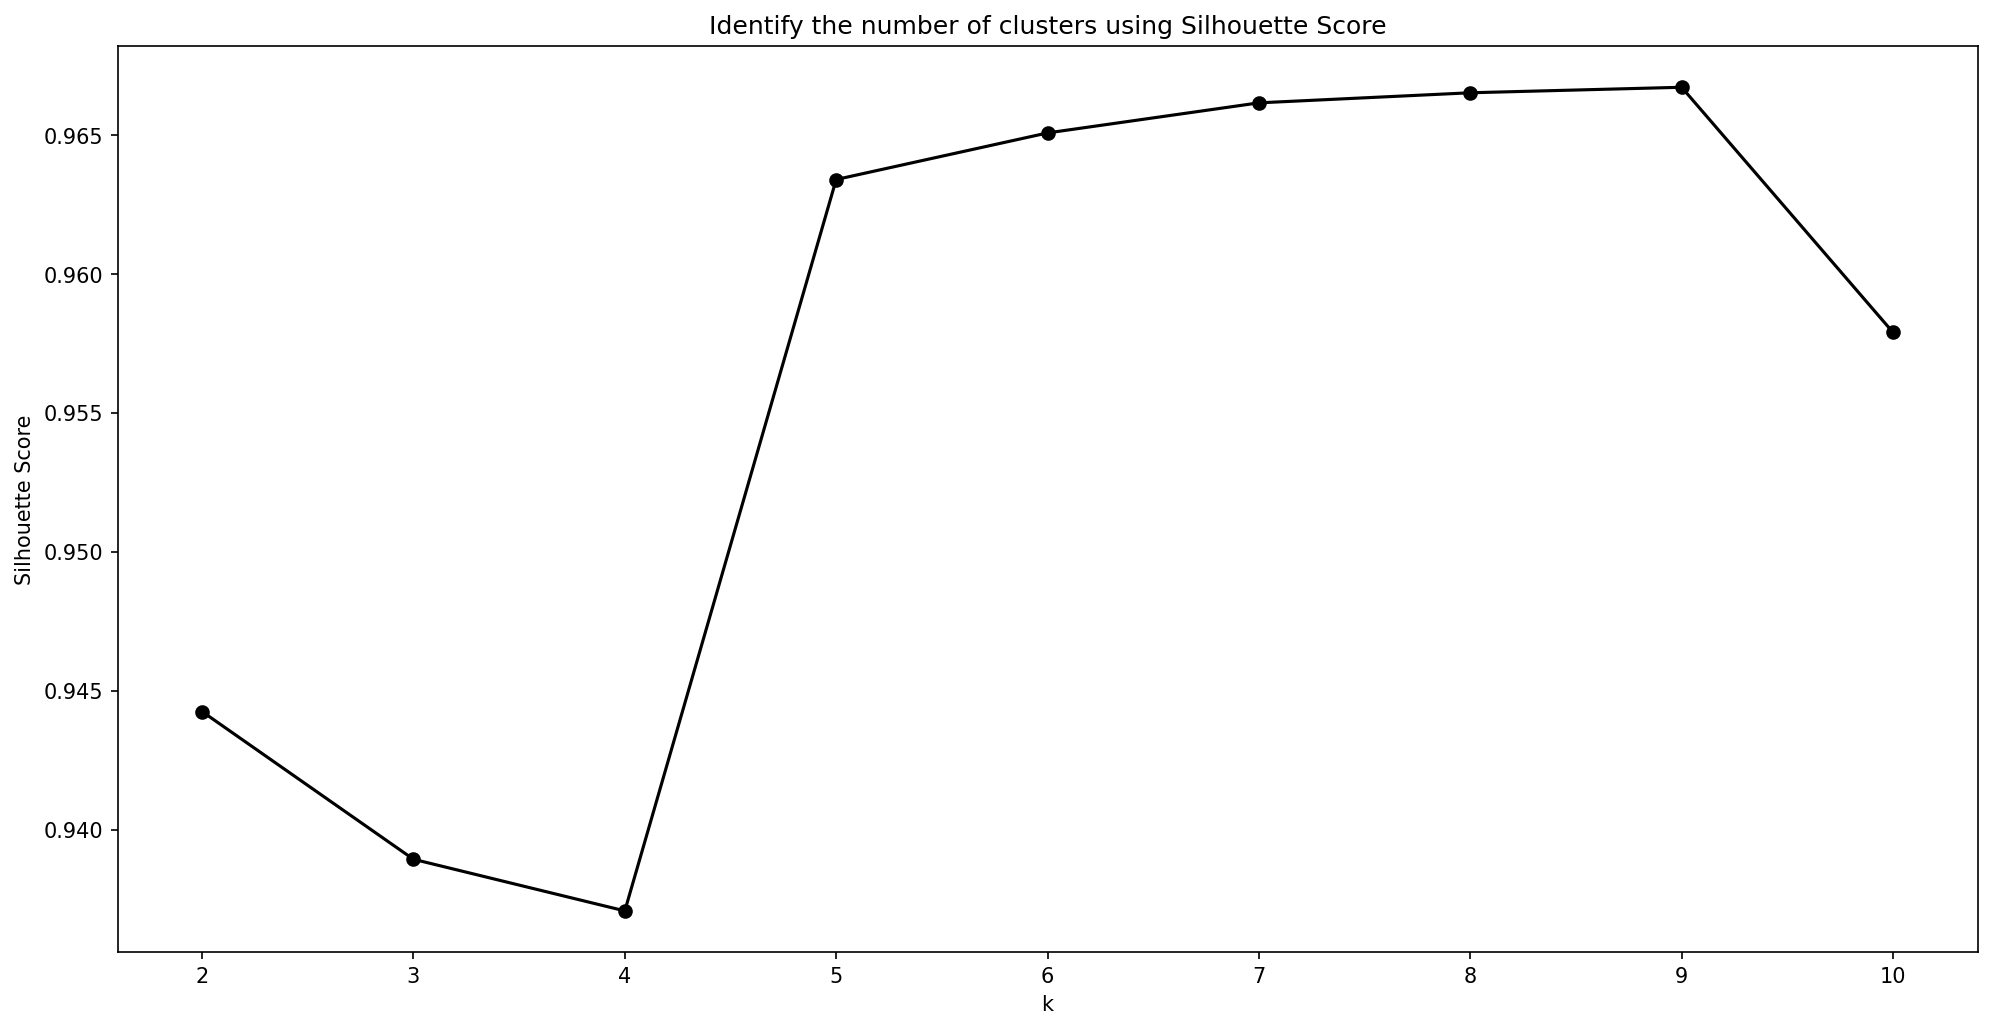

In [146]:
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

for k in K:
    # Set the model and its parameters
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit the model 
    labels = model.fit_predict(pca_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(pca_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=150)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

K means should choose 9 clusters 

GMM

In [284]:
GMM_model = GaussianMixture(n_components=5, # this is the optimal number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=20, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=2 # for reproducibility
                        )

In [285]:
y_pred = GMM_model.fit_predict(pca_df[['pc1']])
pca_df['GMM_cluster'] = y_pred

K means

In [286]:
y_pred = KMeans(n_clusters=9, random_state=0).fit_predict(pca_df[['pc1']])
pca_df['K_means_cluster'] = y_pred
pca_df.head()

,pc1,GMM_cluster,K_means_cluster,target
0,-548.135358,2,1,0
1,-548.138988,2,1,0
2,-548.131635,2,1,0
3,2907.864308,1,3,0
4,-548.139854,2,1,0


Add target variable and compare it with clustering results 

In [287]:
pca_df['target'] = list(X_train['approved'])
pca_df['target'].value_counts()

0    4798
1    1602
Name: target, dtype: int64

In [288]:
pca_df.groupby(['target'])['K_means_cluster'].value_counts(normalize = True)

target  K_means_cluster
0       1                  0.932055
        4                  0.030221
        3                  0.016674
        8                  0.011672
        5                  0.007712
        2                  0.001251
        0                  0.000208
        7                  0.000208
1       1                  0.704120
        4                  0.091760
        0                  0.086142
        2                  0.069913
        5                  0.021223
        3                  0.011236
        6                  0.008739
        7                  0.006866
Name: K_means_cluster, dtype: float64

In [321]:
pca_df.groupby(['K_means_cluster'])['target'].value_counts(normalize = True)

K_means_cluster  target
0                1         0.992806
                 0         0.007194
1                0         0.798571
                 1         0.201429
2                1         0.949153
                 0         0.050847
3                0         0.816327
                 1         0.183673
4                1         0.503425
                 0         0.496575
5                0         0.521127
                 1         0.478873
6                1         1.000000
7                1         0.916667
                 0         0.083333
8                0         1.000000
Name: target, dtype: float64

In [289]:
pca_df.groupby(['target'])['GMM_cluster'].value_counts(normalize = True)

target  GMM_cluster
0       2              0.929137
        1              0.039183
        0              0.030013
        4              0.001459
        3              0.000208
1       2              0.703496
        3              0.094881
        0              0.091760
        4              0.076779
        1              0.033084
Name: GMM_cluster, dtype: float64

In [322]:
pca_df.groupby(['GMM_cluster'])['target'].value_counts(normalize = True)

GMM_cluster  target
0            1         0.505155
             0         0.494845
1            0         0.780083
             1         0.219917
2            0         0.798209
             1         0.201791
3            1         0.993464
             0         0.006536
4            1         0.946154
             0         0.053846
Name: target, dtype: float64

while evaluating, when we have one pc, kmeans and GMM don't have much substantial difference in their relationship with the target values 

### ICA

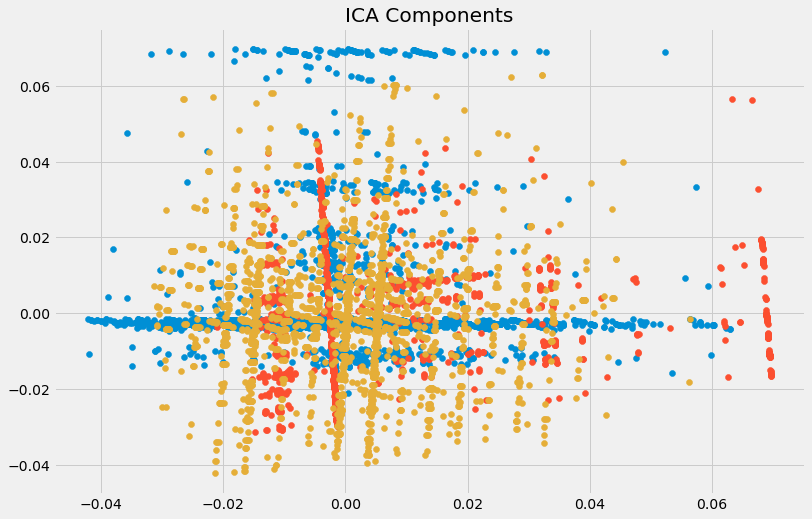

In [292]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X_ica=ICA.fit_transform(X.values)
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X_ica[:,0], X_ica[:,1])
plt.scatter(X_ica[:,1], X_ica[:,2])
plt.scatter(X_ica[:,2], X_ica[:,0])

In [299]:
kurtosis_df = pd.DataFrame(columns = ['component', 'mean_kurtosis'])
for component in range(2,10):  
    ica = FastICA(n_components=component, random_state=2)
    ica.fit(X)
    X_array = ica.transform(X)
    print([component, kurtosis(X_array).mean()])
    kurtosis_df.loc[len(kurtosis_df.index)] = [component, kurtosis(X_array).mean()]


[2, 11.52197786826752]
[3, 7.956123844973791]
[4, 5.6798477039070026]
[5, 4.238963856730501]
[6, 3.35273362927459]
[7, 2.797331015025686]
[8, 2.1173913132473907]
[9, 1.7825524251655063]


Text(0.5, 1.0, 'Mean Kurtosis')

<Figure size 864x576 with 0 Axes>

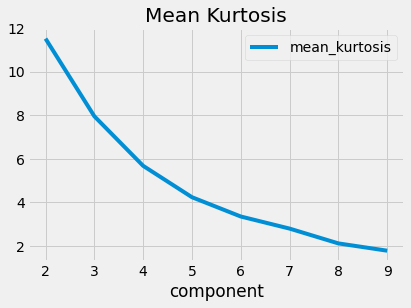

In [300]:
plt.figure(figsize=(12,8))
kurtosis_df.plot(x="component", y="mean_kurtosis", kind="line")
plt.title('Mean Kurtosis')

In [153]:
ica = FastICA(n_components=3, random_state=2)
ica_df = pd.DataFrame(ica.fit_transform(X), columns = ['pc1', 'pc2','pc3'])
ica_df.head()

,pc1,pc2,pc3
0,0.005562,0.002852,-0.000301
1,0.004929,0.002804,-0.008572
2,0.005706,0.002878,0.007913
3,0.008368,-0.013495,-0.001623
4,-0.000082,0.002580,-0.011214


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


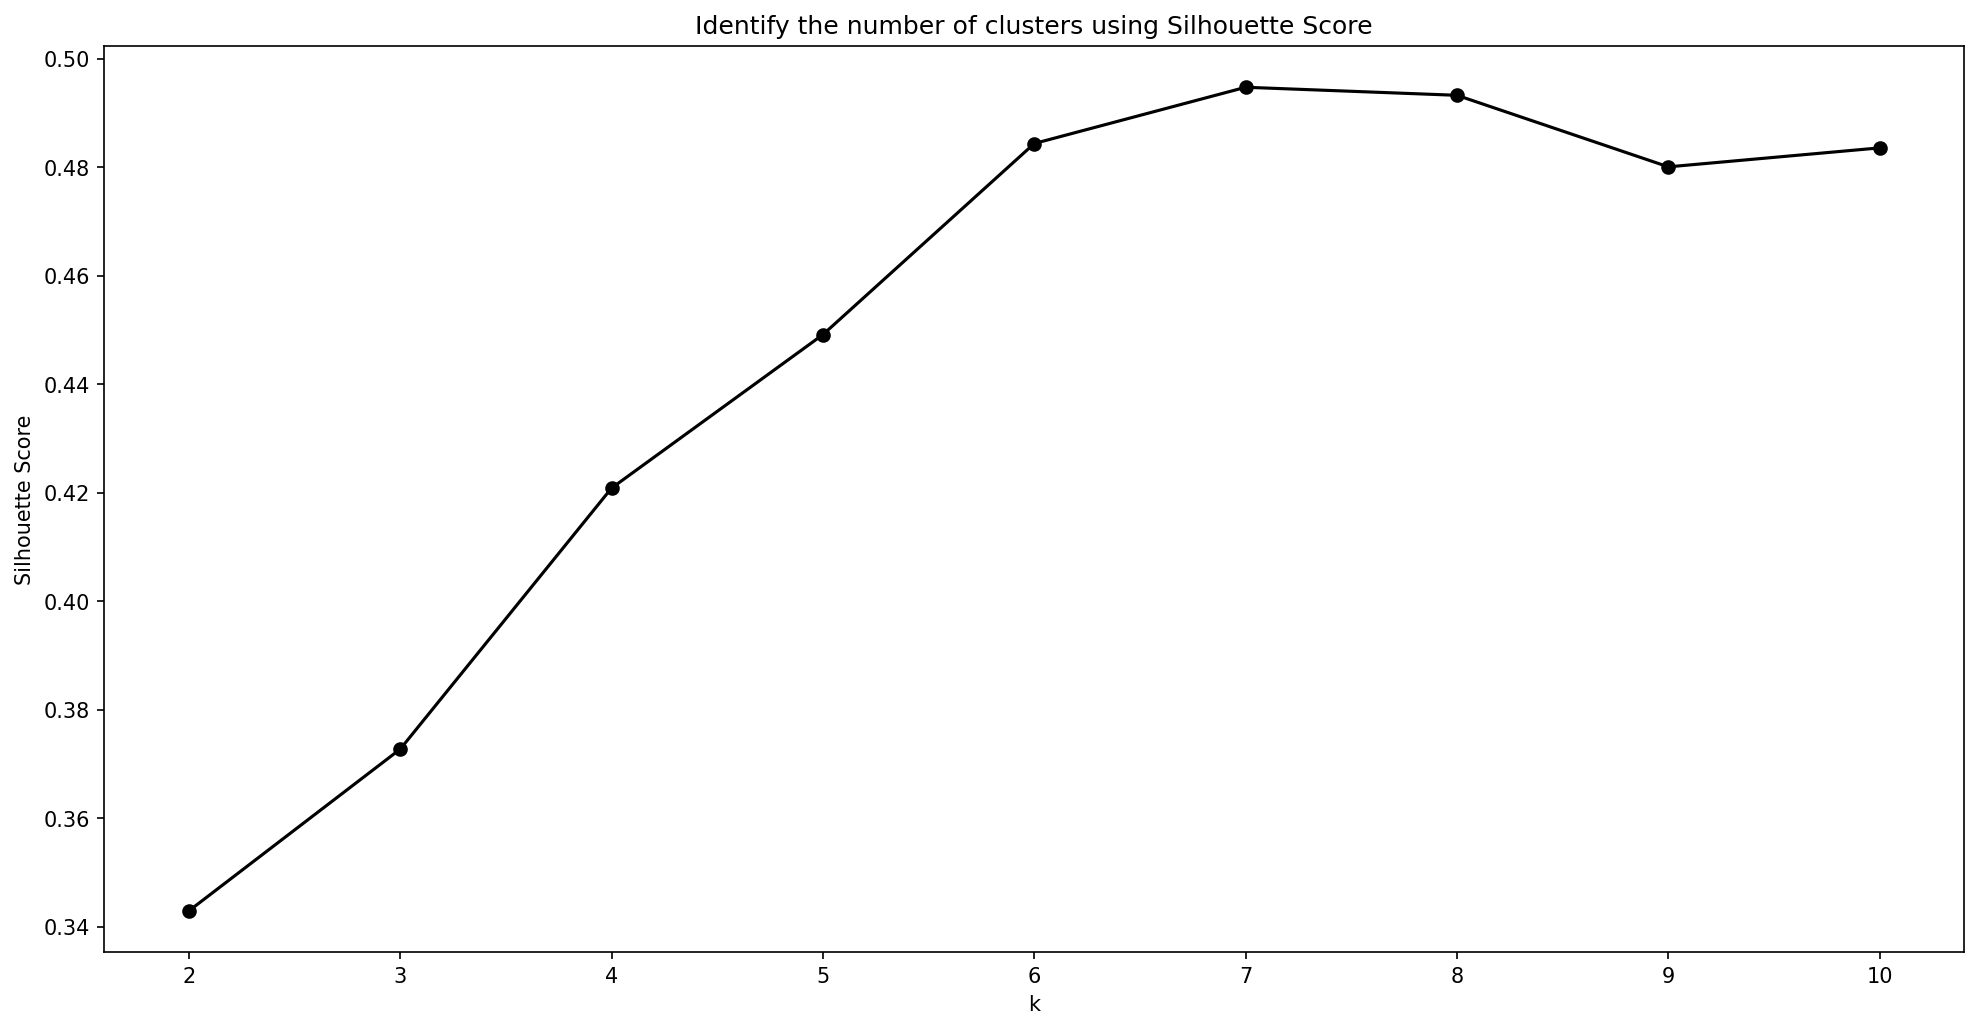

In [156]:
## K means choose k
## ICA K means: 7 clusters 
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

for k in K:
    # Set the model and its parameters
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit the model 
    labels = model.fit_predict(ica_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(ica_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=150)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


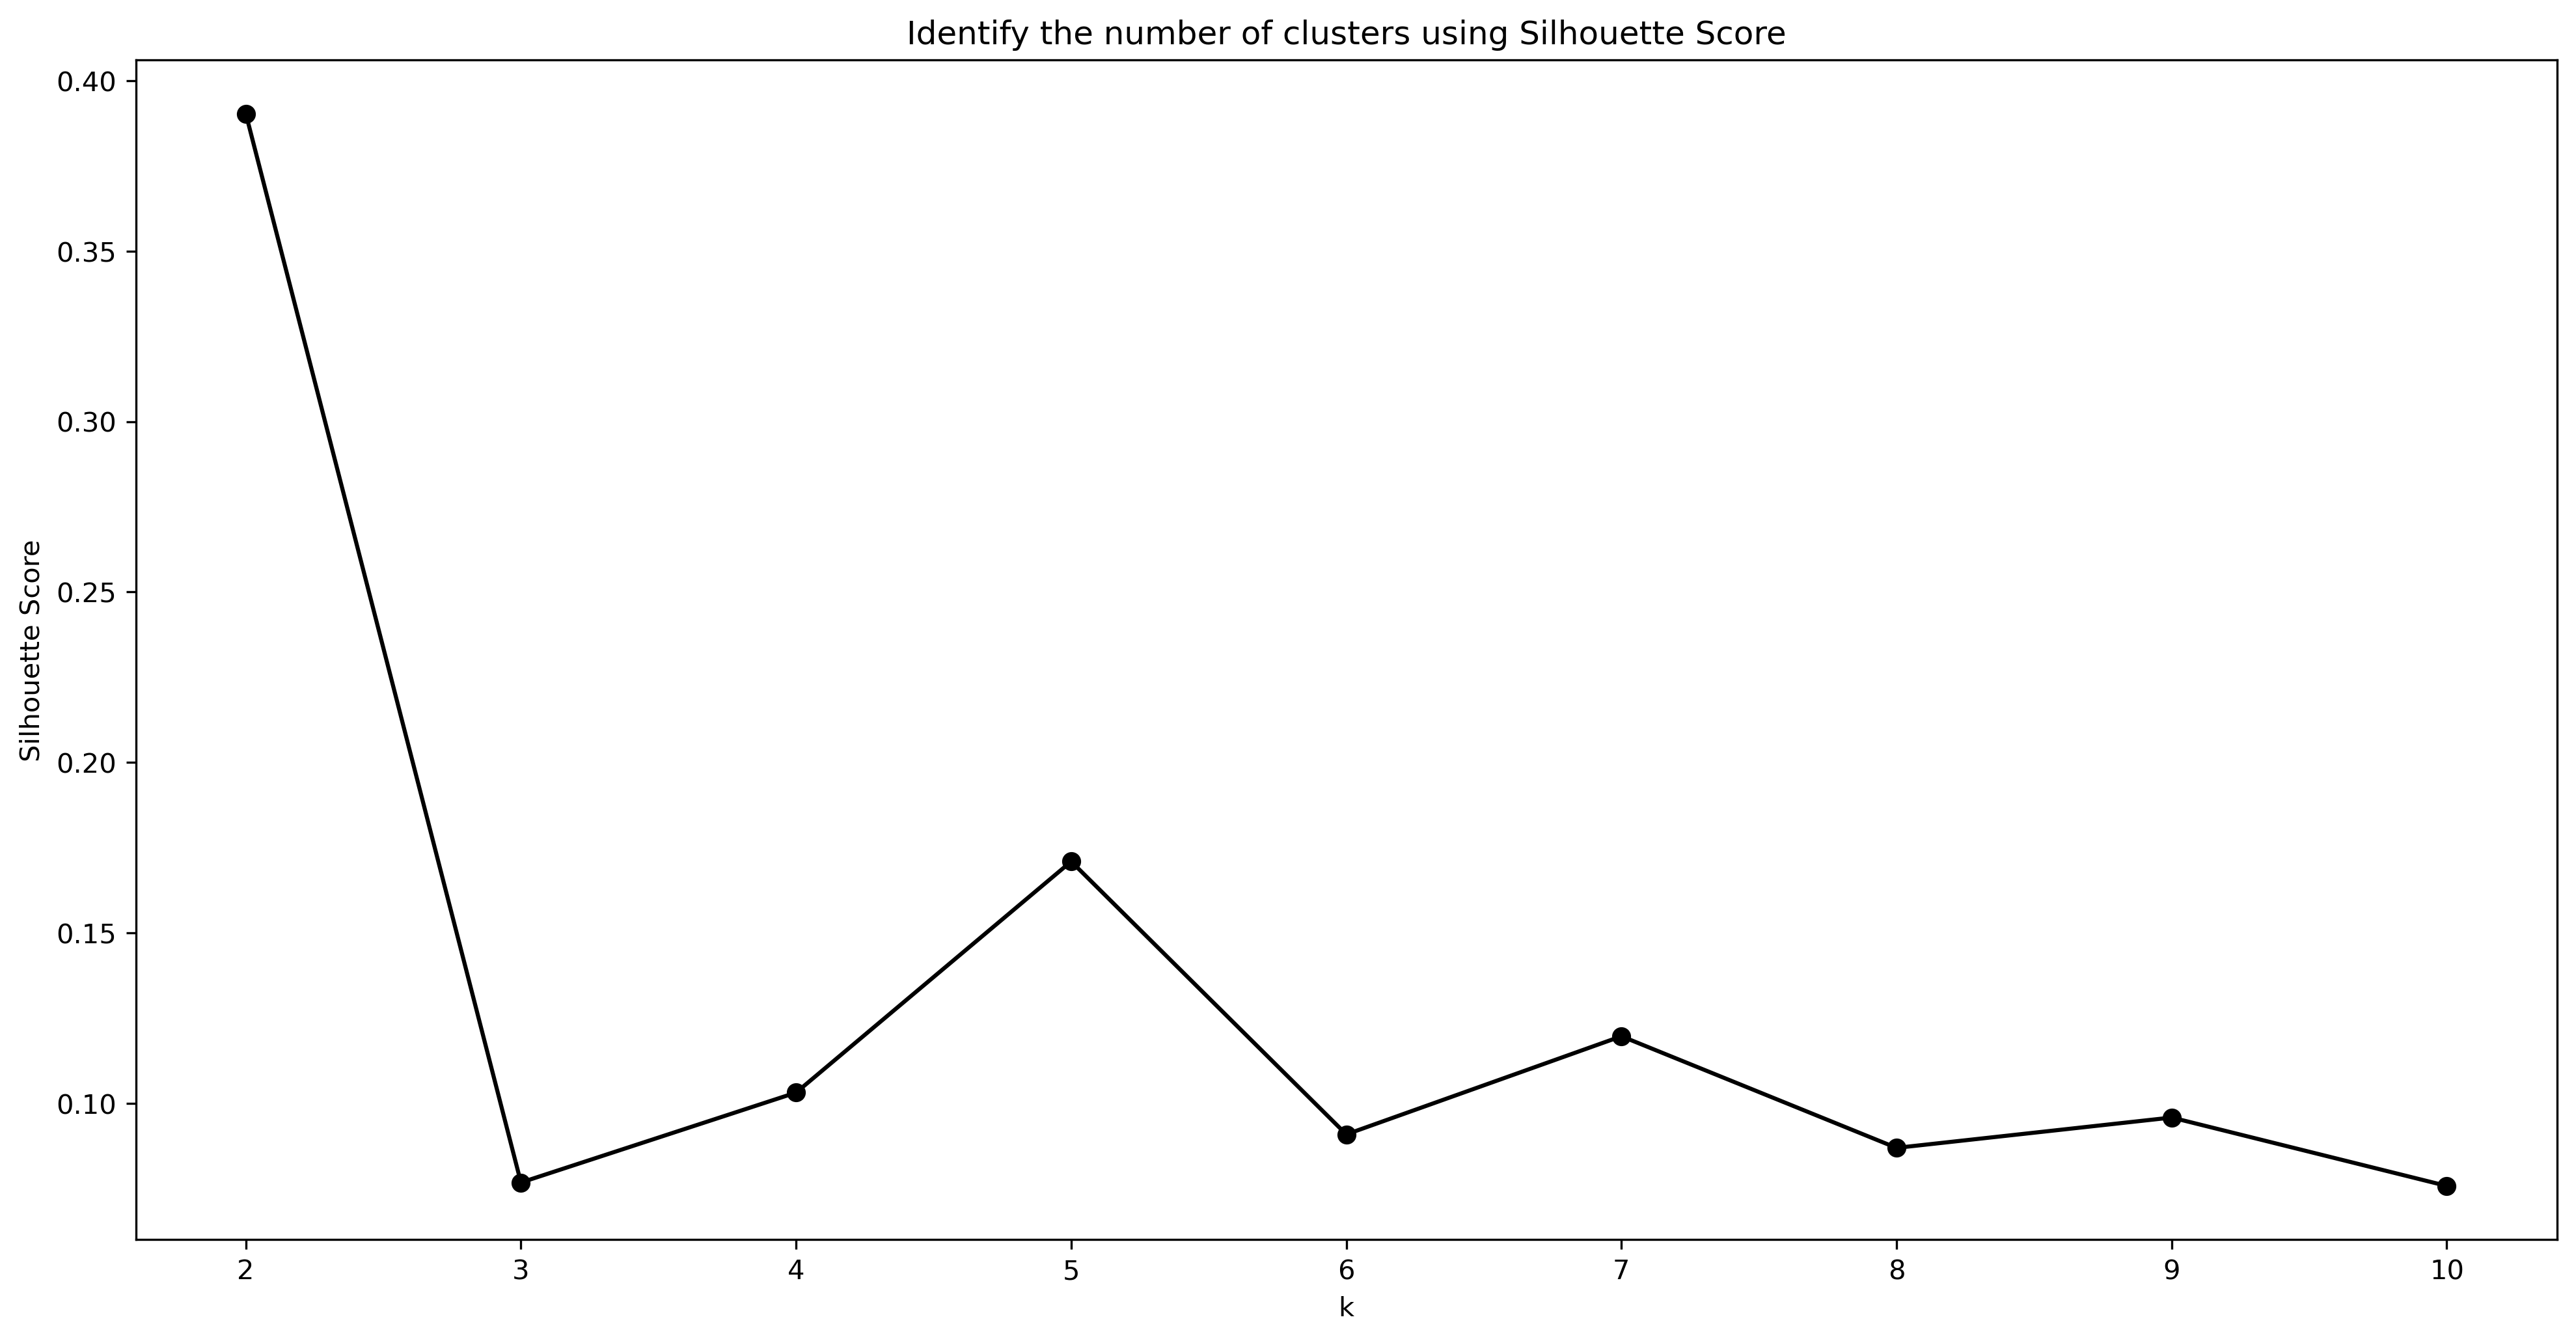

In [157]:
## GMM choose number of clusters 
## ica GMM: 2 clusters 
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model

X = X_train.drop(['approved', 'user_id'], axis = 1)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(ica_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(ica_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

GMM

In [274]:
GMM_model = GaussianMixture(n_components=2, # this is the optimal number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=20, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=2 # for reproducibility
                        )

In [275]:
y_pred = GMM_model.fit_predict(ica_df[['pc1', 'pc2', 'pc3']])
ica_df['GMM_cluster'] = y_pred

K-means

In [276]:
y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(ica_df[['pc1']])
ica_df['K_means_cluster'] = y_pred
ica_df.head()

,pc1,pc2,pc3,GMM_cluster,K_means_cluster
0,0.005562,0.002852,-0.000301,0,0
1,0.004929,0.002804,-0.008572,0,0
2,0.005706,0.002878,0.007913,0,0
3,0.008368,-0.013495,-0.001623,1,0
4,-0.000082,0.002580,-0.011214,0,3


In [277]:
ica_df['target'] = list(X_train['approved'])
ica_df['target'].value_counts()

0    4798
1    1602
Name: target, dtype: int64

In [278]:
ica_df.groupby(['target'])['K_means_cluster'].value_counts(normalize = True)

target  K_means_cluster
0       0                  0.374114
        3                  0.232180
        1                  0.138391
        4                  0.080450
        5                  0.071280
        2                  0.060859
        6                  0.042726
1       1                  0.244070
        0                  0.216604
        3                  0.187266
        6                  0.165418
        5                  0.121723
        4                  0.051186
        2                  0.013733
Name: K_means_cluster, dtype: float64

In [323]:
ica_df.groupby(['K_means_cluster'])['target'].value_counts(normalize = True)

K_means_cluster  target
0                0         0.838002
                 1         0.161998
1                0         0.629384
                 1         0.370616
2                0         0.929936
                 1         0.070064
3                0         0.787836
                 1         0.212164
4                0         0.824786
                 1         0.175214
5                0         0.636872
                 1         0.363128
6                1         0.563830
                 0         0.436170
Name: target, dtype: float64

In [279]:
ica_df.groupby(['target'])['GMM_cluster'].value_counts(normalize = True)

target  GMM_cluster
0       0              0.931638
        1              0.068362
1       0              0.704120
        1              0.295880
Name: GMM_cluster, dtype: float64

In [324]:
ica_df.groupby(['GMM_cluster'])['target'].value_counts(normalize = True)

GMM_cluster  target
0            0         0.798499
             1         0.201501
1            1         0.591022
             0         0.408978
Name: target, dtype: float64

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

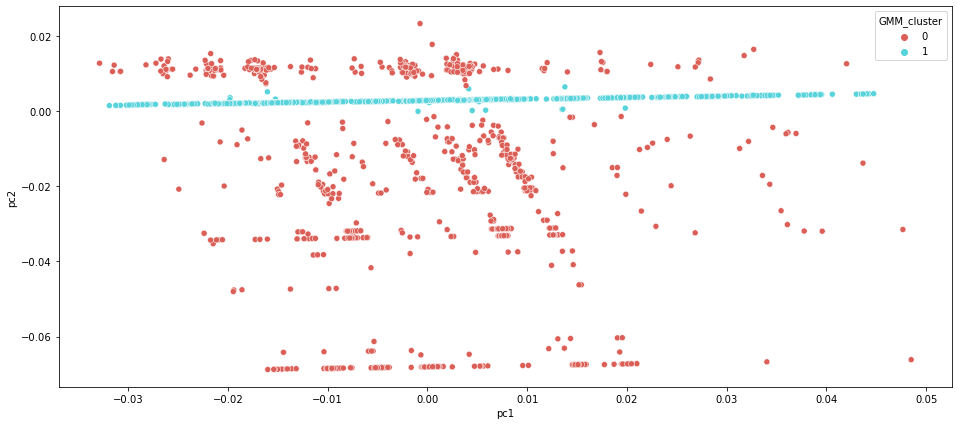

In [137]:
import seaborn as sns
plt.figure(figsize=(16,7))
sns.scatterplot(x='pc1',y='pc2',hue='GMM_cluster',palette=sns.color_palette("hls",2),data=ica_df,
               legend="full")


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

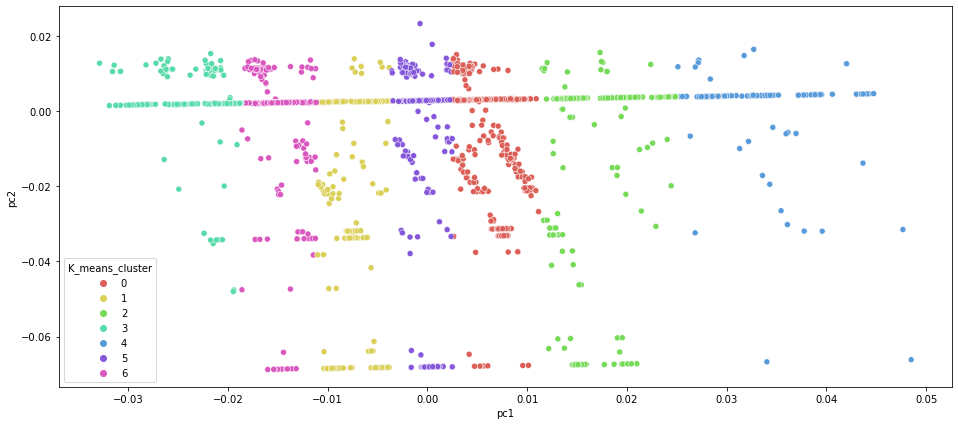

In [139]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='pc1',y='pc2',hue='K_means_cluster',palette=sns.color_palette("hls",7),data=ica_df,
               legend="full")

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

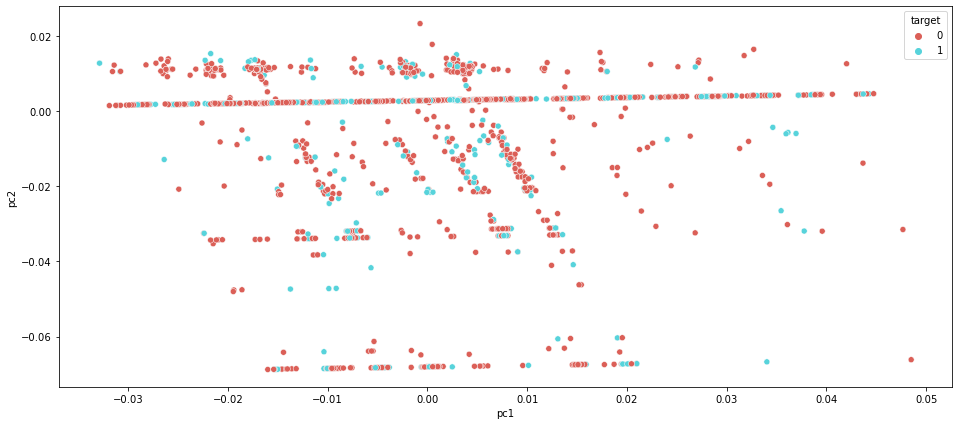

In [140]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='pc1',y='pc2',hue='target',palette=sns.color_palette("hls",2),data=ica_df,
               legend="full")

### Randomized Projection 

In [88]:
from scprep.reduce import InvertibleRandomProjection
import pandas as pd
reconstruction_error_df = pd.DataFrame(columns = ['component', 'reconstruction_error'])

for i in range(1, 20):
    rp = InvertibleRandomProjection(n_components= i, random_state=2)
    X_rp= rp.fit_transform(X)
    component_rp = rp.components_
    X_projected =rp.inverse_transform(X_rp)
    loss = np.sum((X - X_projected) ** 2, axis=1).mean()
    reconstruction_error_df.loc[len(reconstruction_error_df.index)] = [i, loss]

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:381: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (3 < 4).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:381: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (3 < 5).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:381: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (3 < 6).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning,
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:381: DataDimension

<AxesSubplot:xlabel='component'>

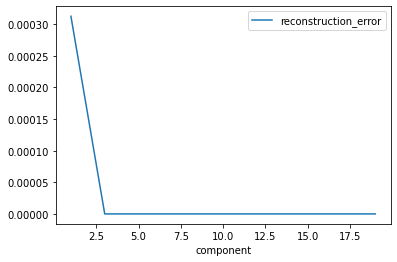

In [89]:
reconstruction_error_df.plot(x='component', y = 'reconstruction_error', kind = 'line')

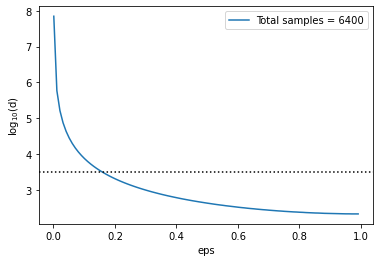

In [90]:
from sklearn.random_projection import SparseRandomProjection, johnson_lindenstrauss_min_dim
from sklearn.random_projection import GaussianRandomProjection
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets as dt
from sklearn.metrics.pairwise import euclidean_distances
eps = np.arange(0.001, 0.999, 0.01)
min_dim = johnson_lindenstrauss_min_dim(n_samples=6400, eps=eps)
label = 'Total samples = ' + str(6400)
plt.plot(eps, np.log10(min_dim), label=label)
plt.xlabel('eps')
plt.ylabel('log$_{10}$(d)')
plt.axhline(y=3.5, color='k', linestyle=':')
plt.legend()
plt.show()

In [258]:
rp = GaussianRandomProjection(n_components=3, random_state=2)
rp_df = pd.DataFrame(rp.fit_transform(X), columns = ['pc1', 'pc2', 'pc3'])
rp_df.head()

,pc1,pc2,pc3
0,-5.970854,3.211595,23.379622
1,-4.702020,1.946792,19.242496
2,-4.777728,7.520837,29.315013
3,-3582.517559,1686.827327,1017.939627
4,-5.831571,-0.540026,16.946396


**Choosing number of clusters**

Choose number of clusters for K means

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


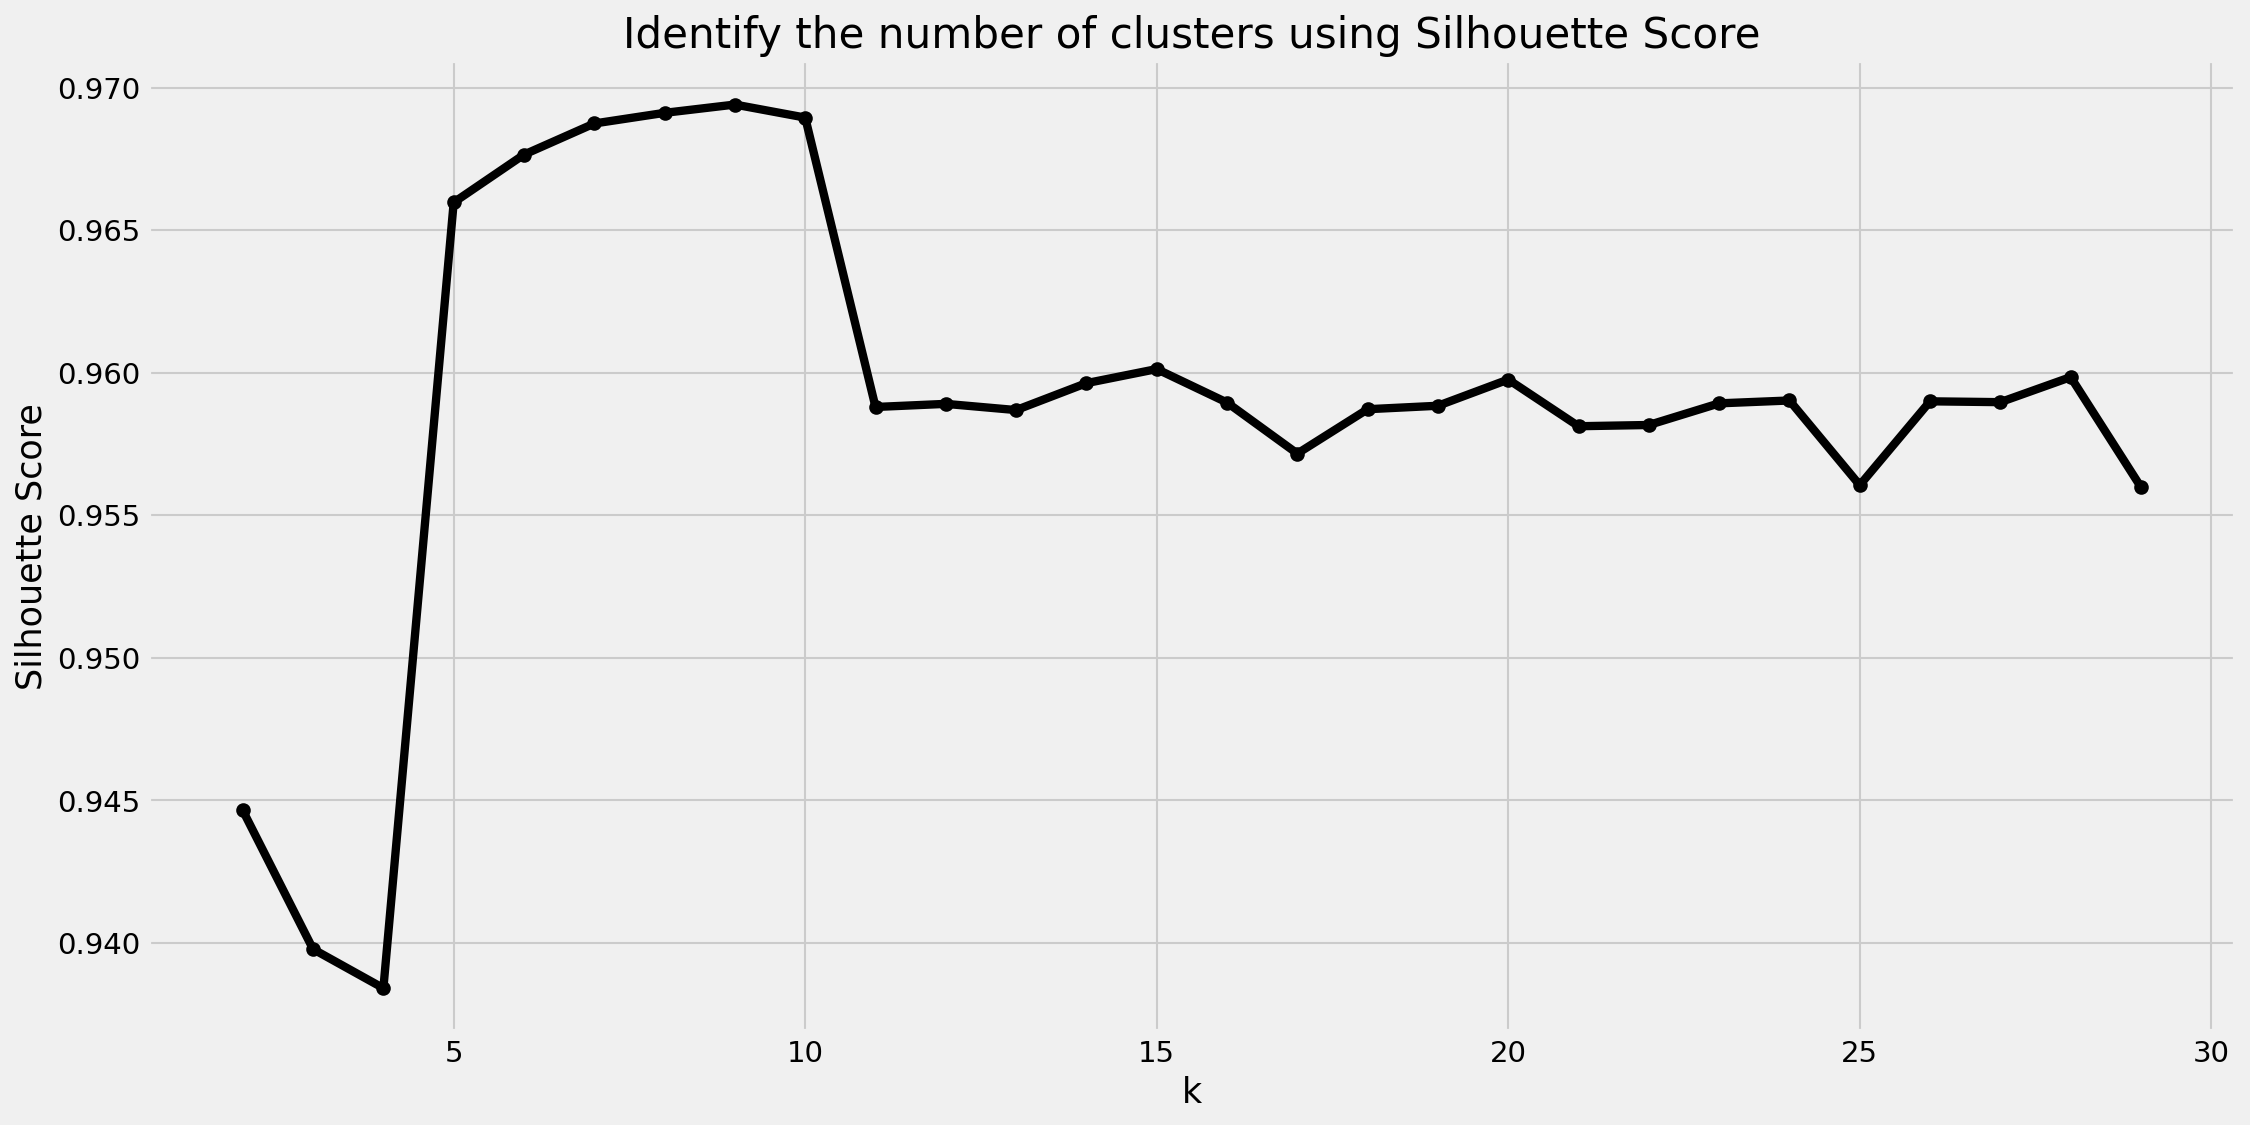

In [225]:
## K means choose k
S=[]

# Range of clusters to try (2 to 10)
K=range(2,30)

for k in K:
    # Set the model and its parameters
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=2)
    # Fit the model 
    labels = model.fit_predict(rp_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(rp_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=150)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [228]:
max(S)

0.9694126119845393

For n_clusters = 2 The average silhouette_score is : 0.9446480624500555
For n_clusters = 3 The average silhouette_score is : 0.9397813760108994
For n_clusters = 4 The average silhouette_score is : 0.9384116596370328
For n_clusters = 5 The average silhouette_score is : 0.9659777416436114
For n_clusters = 6 The average silhouette_score is : 0.9676567398403598
For n_clusters = 7 The average silhouette_score is : 0.9687486162489881
For n_clusters = 8 The average silhouette_score is : 0.969121675678452
For n_clusters = 9 The average silhouette_score is : 0.9694126119845393


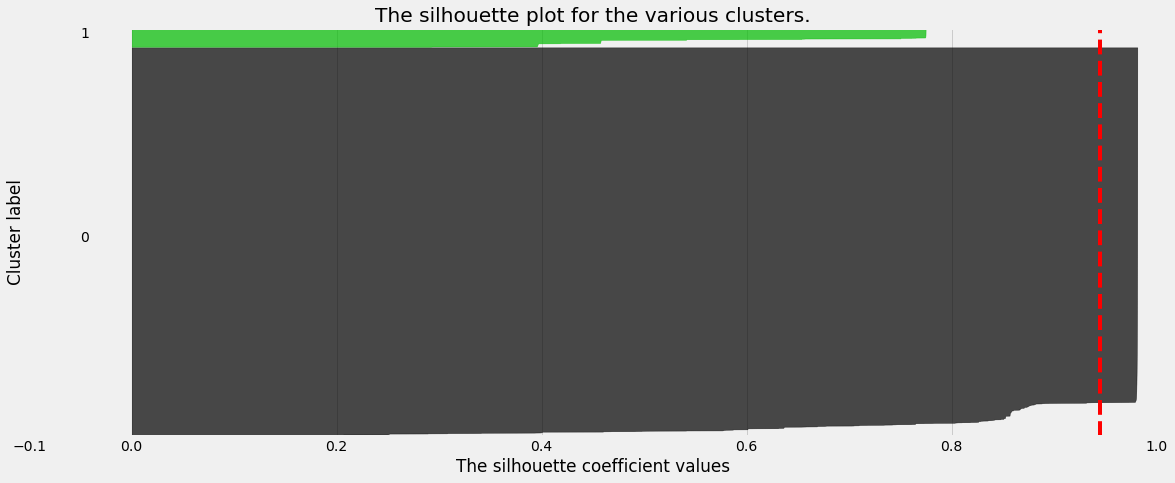

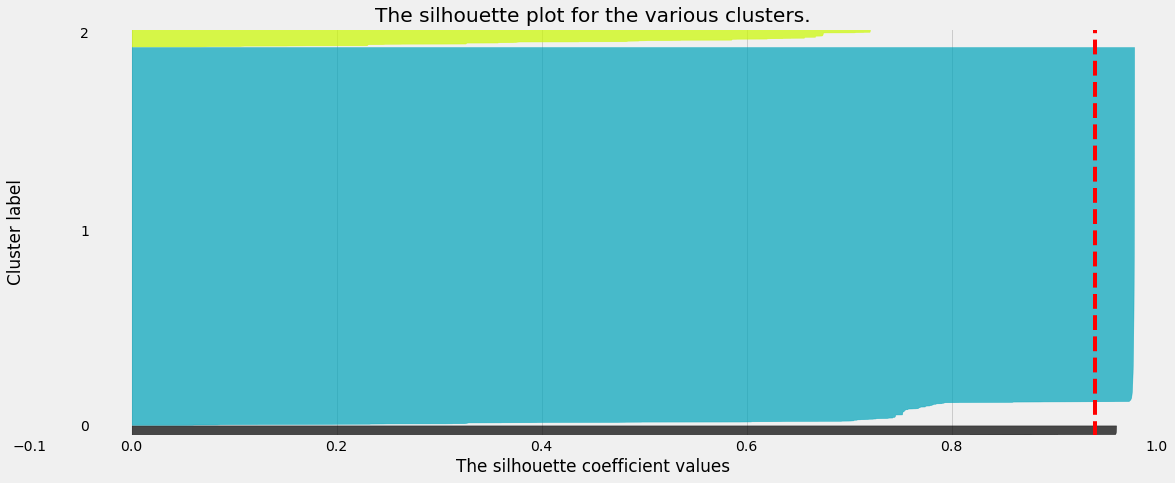

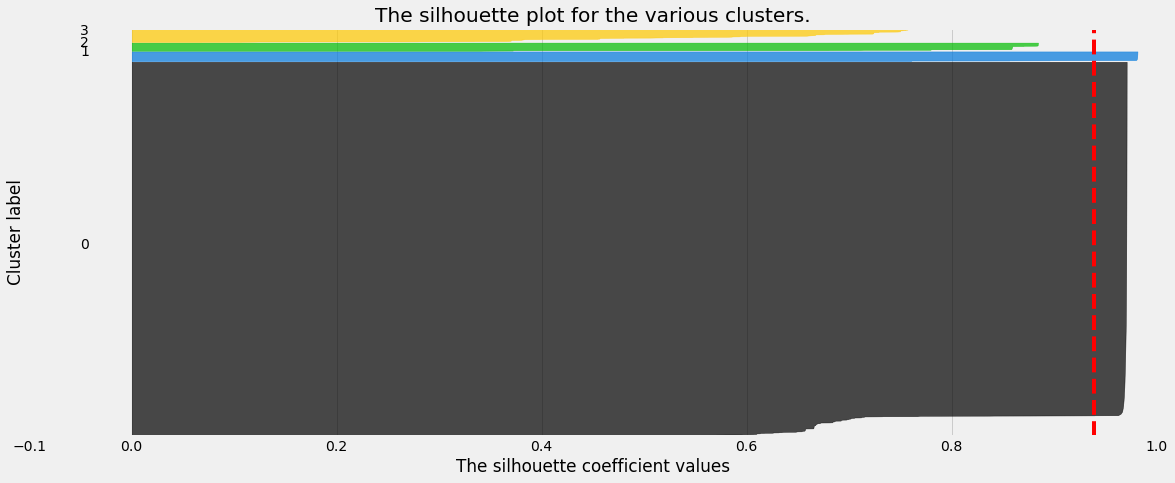

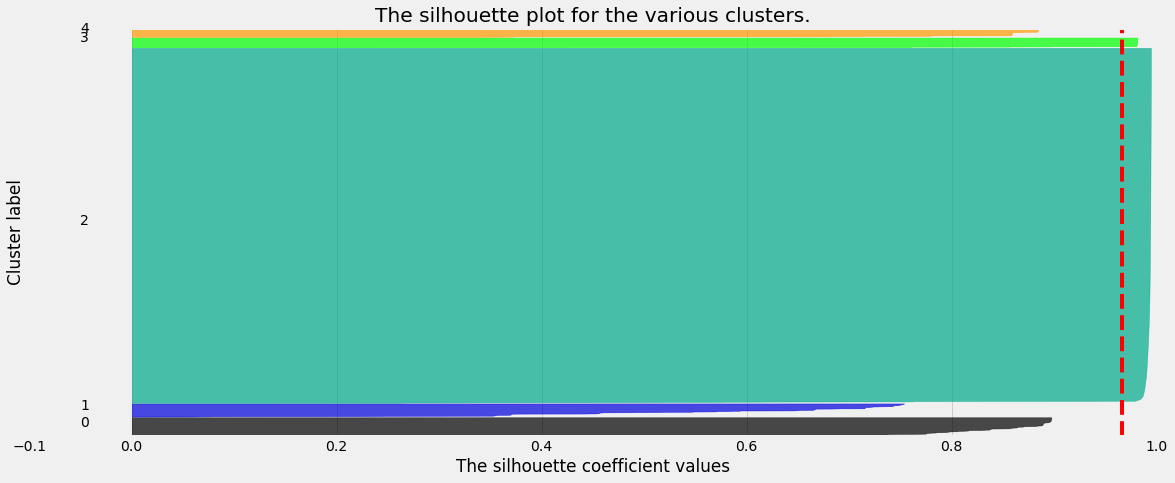

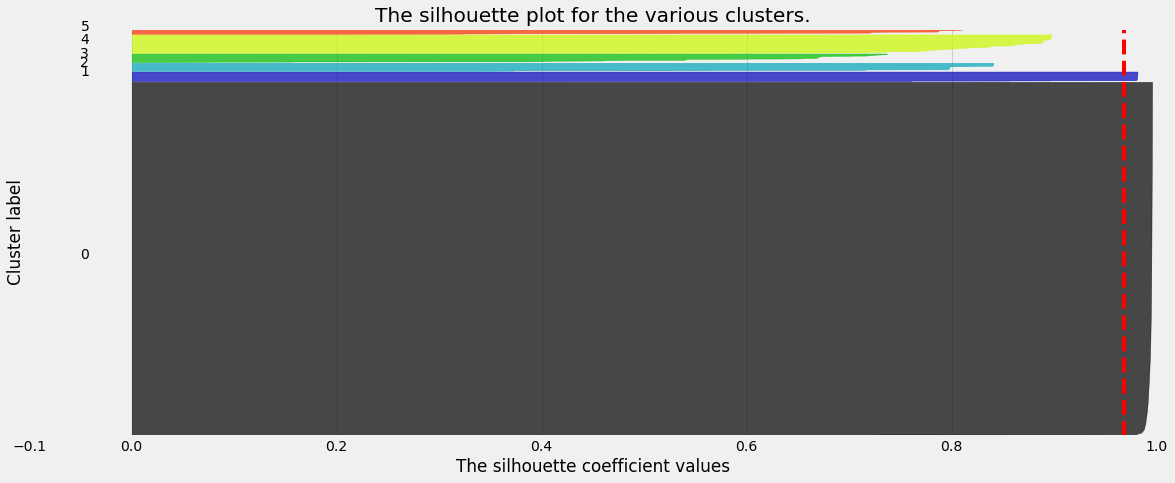

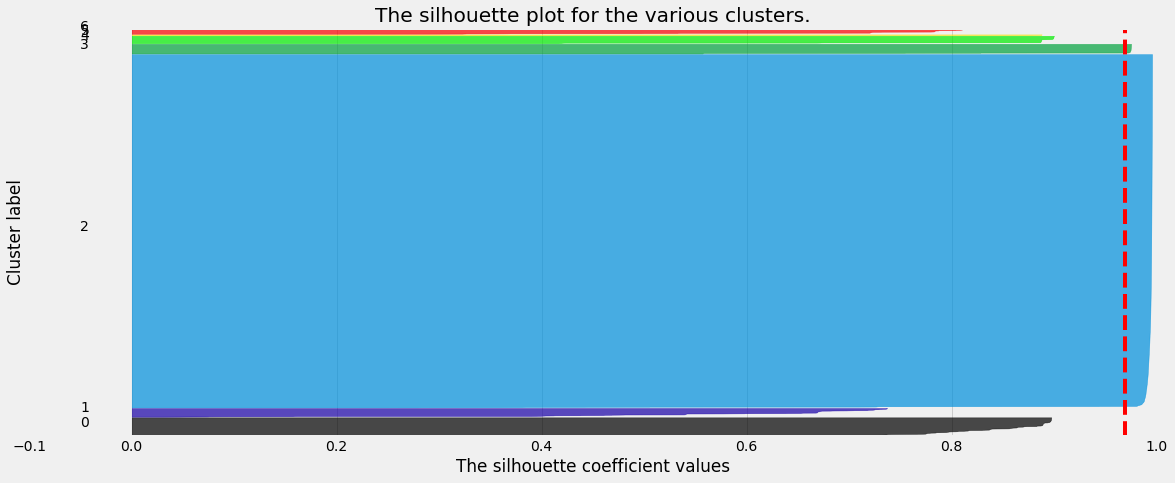

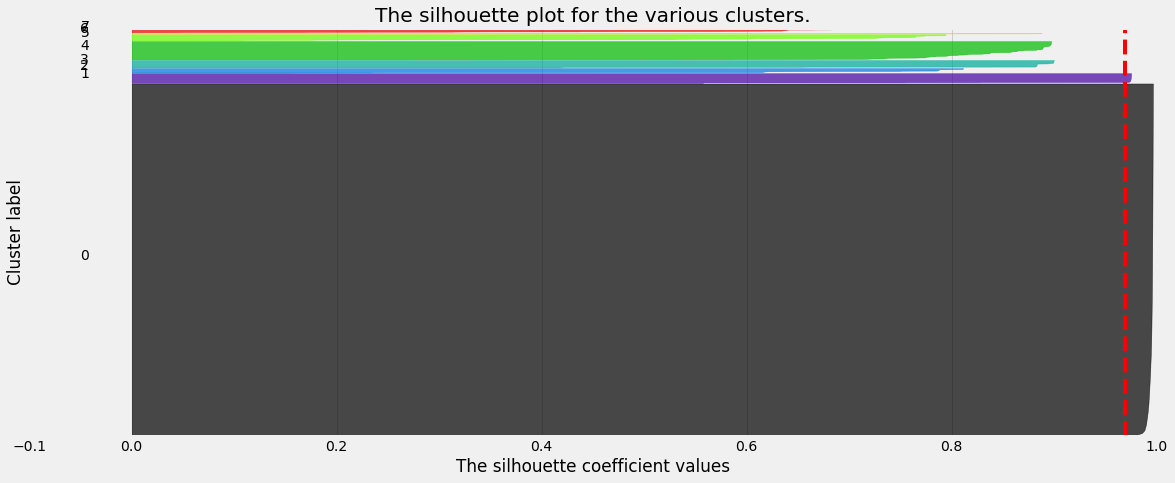

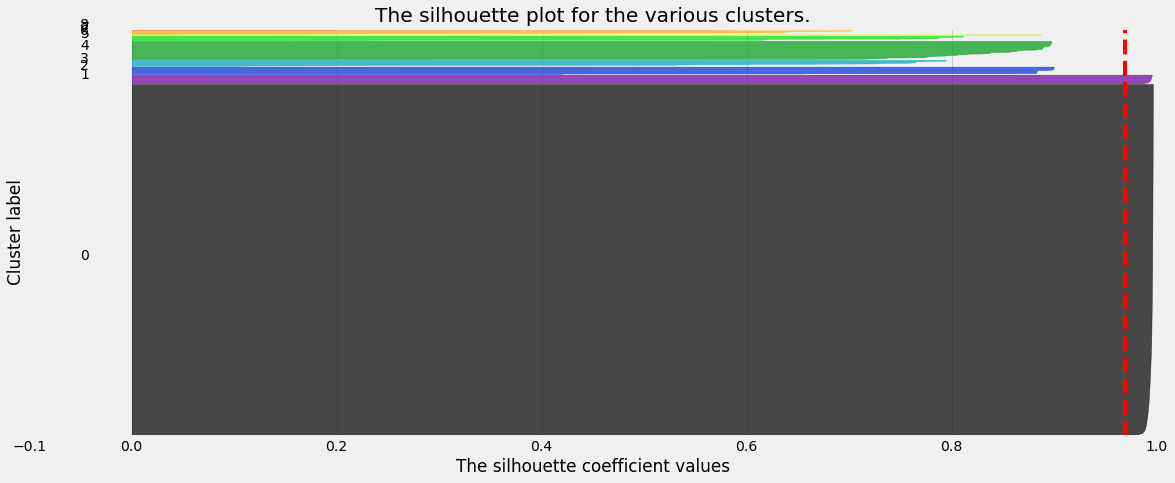

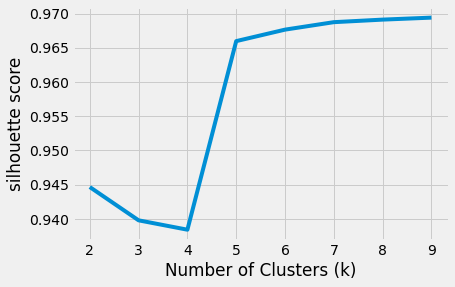

In [229]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style
range_n_clusters = range(2,10)
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = clusterer.fit_predict(rp_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rp_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rp_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

Choose number of cluster for GMM

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


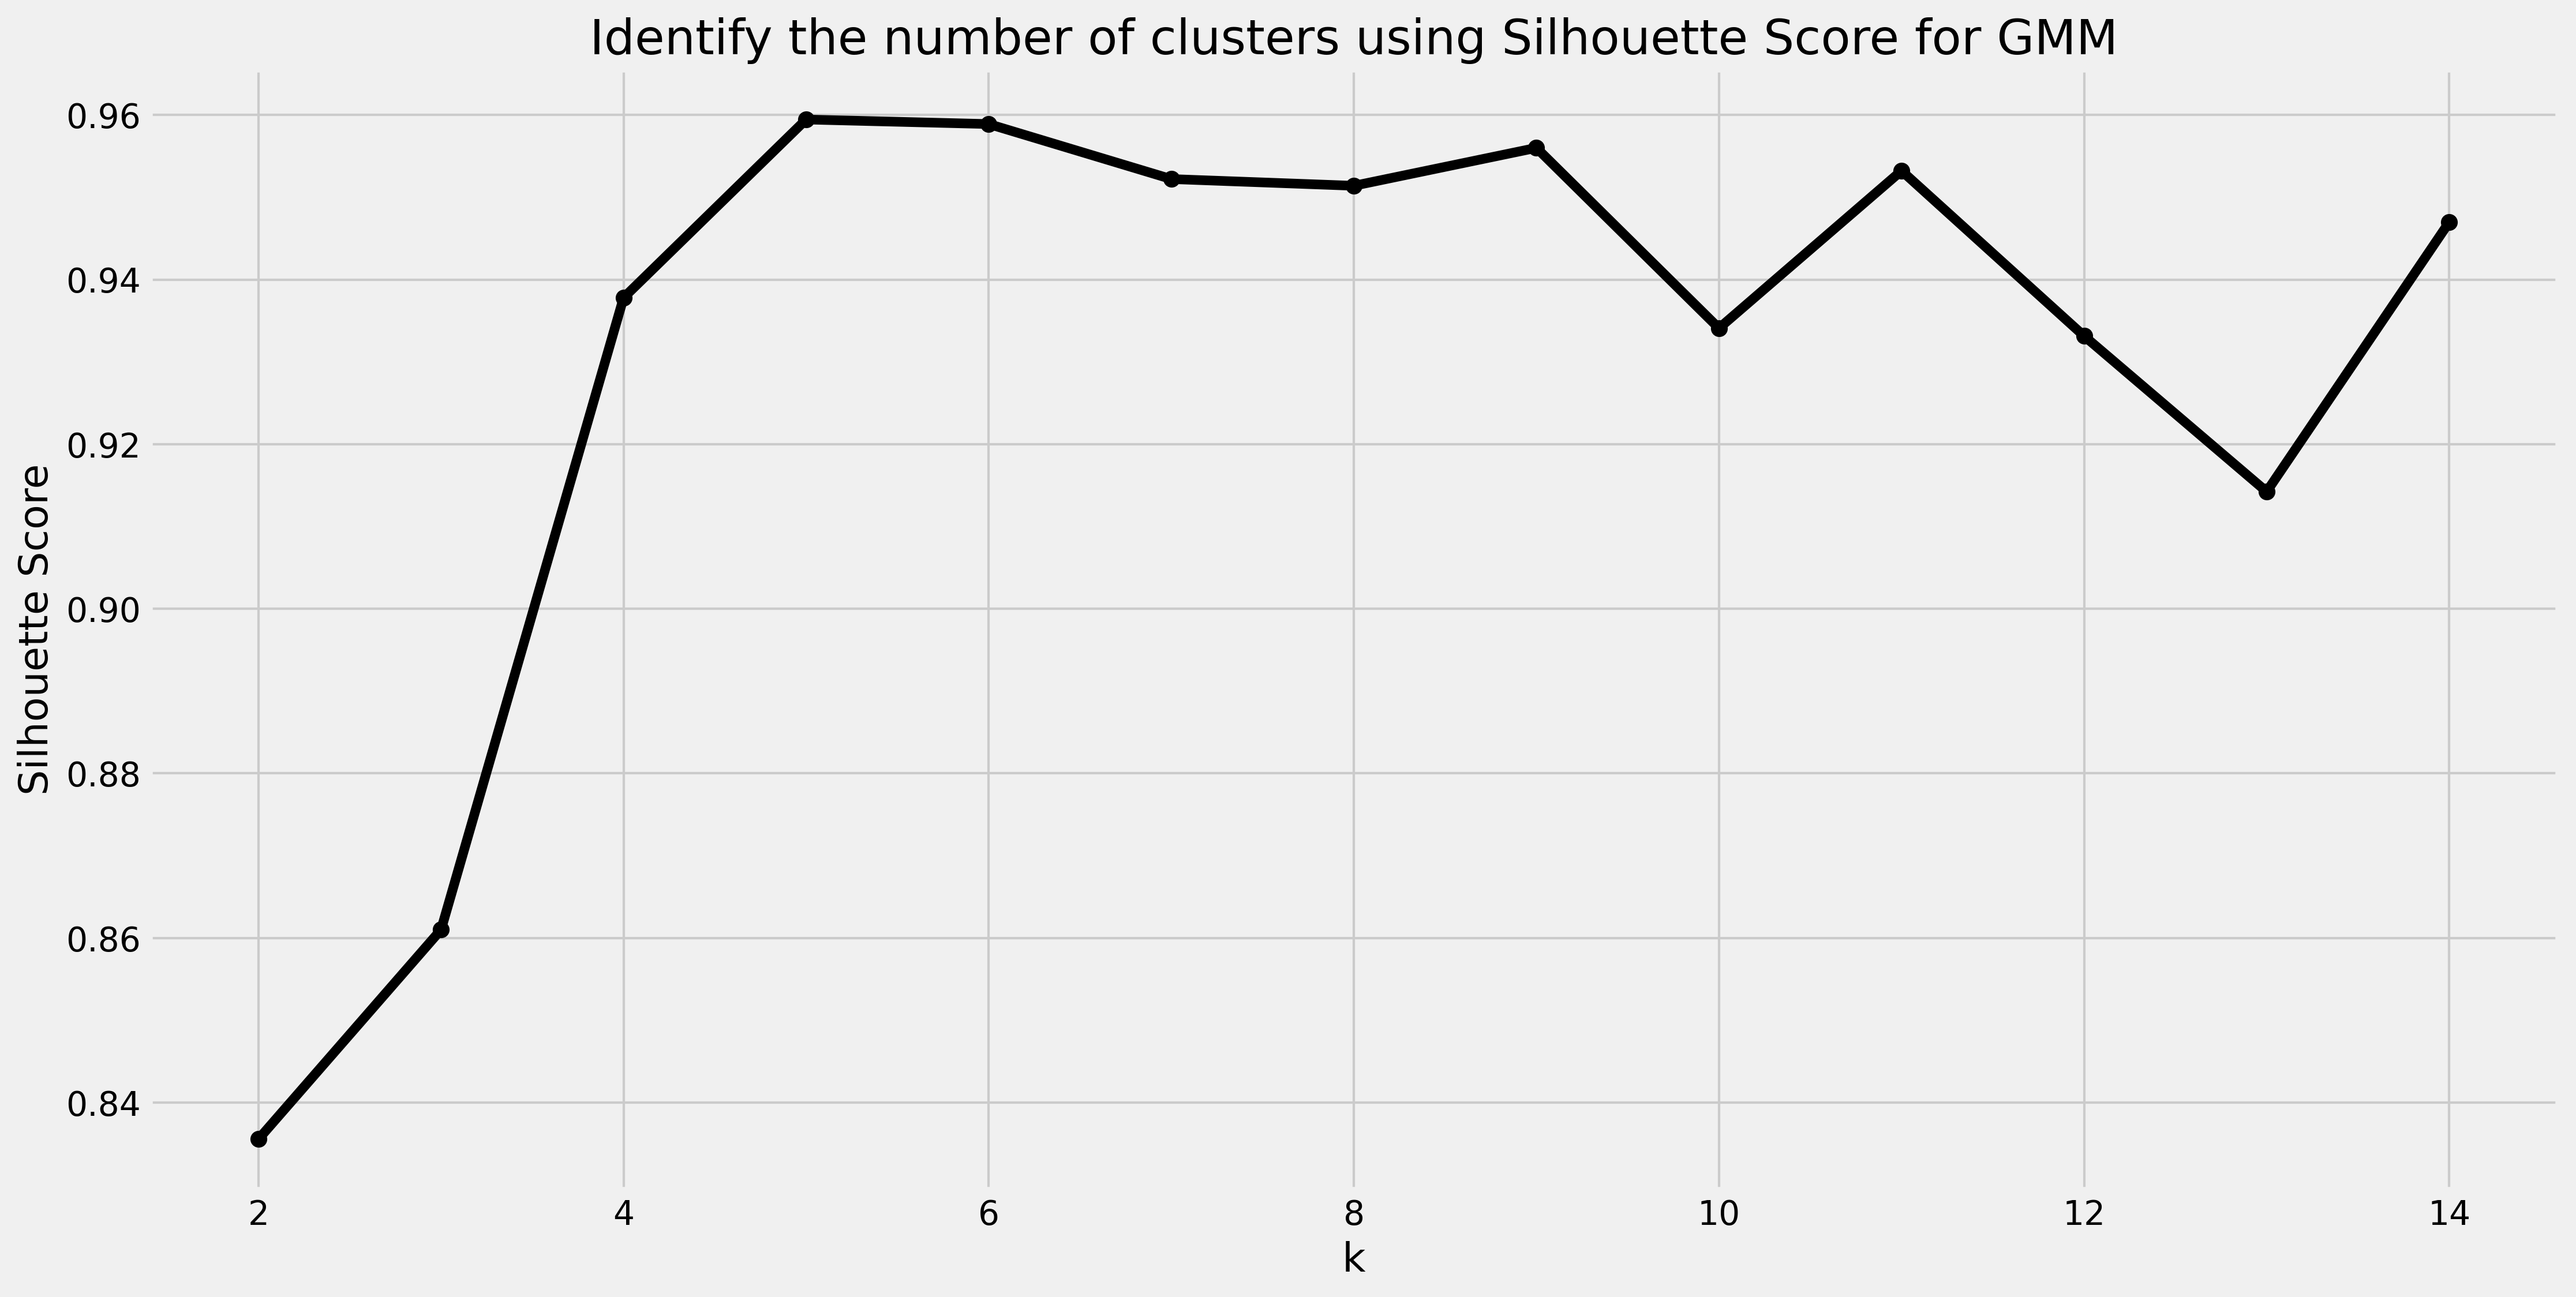

In [234]:
## GMM choose number of clusters 
## ica GMM: 2 clusters 
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,15)

# Select data for clustering model

X = X_train.drop(['approved', 'user_id'], axis = 1)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(rp_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(rp_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score for GMM')
plt.show()

In [233]:
max(S)

0.9594558520484847

In [ ]:
## silhouette score highest at 8 clusters for GMM 

For n_clusters = 2 The average silhouette_score is : 0.8355607142839229
For n_clusters = 3 The average silhouette_score is : 0.8610090827502908
For n_clusters = 4 The average silhouette_score is : 0.9378058020261506
For n_clusters = 5 The average silhouette_score is : 0.9594558520484847
For n_clusters = 6 The average silhouette_score is : 0.9533569881110503
For n_clusters = 7 The average silhouette_score is : 0.9522187950468666
For n_clusters = 8 The average silhouette_score is : 0.9516495264682687
For n_clusters = 9 The average silhouette_score is : 0.956005895922799


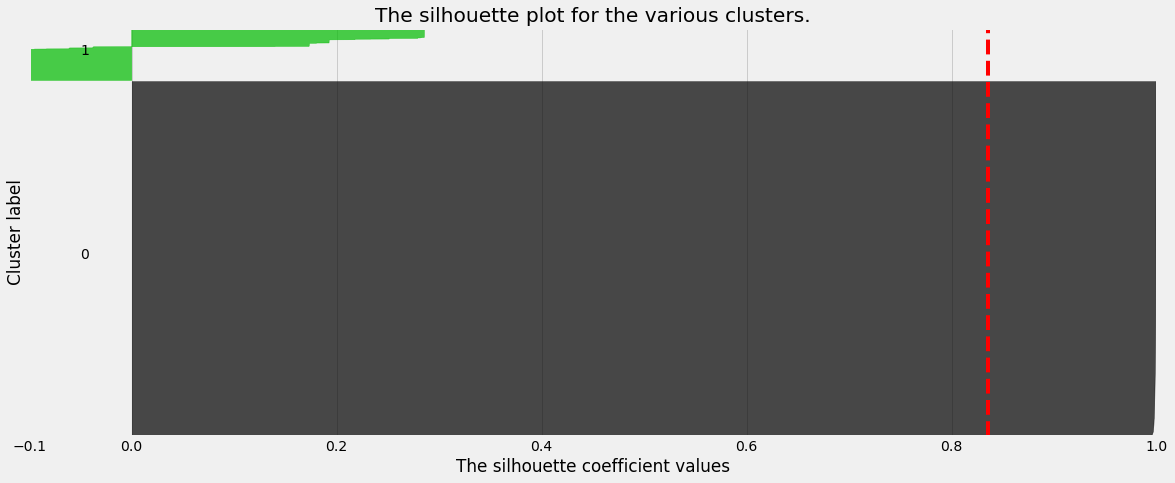

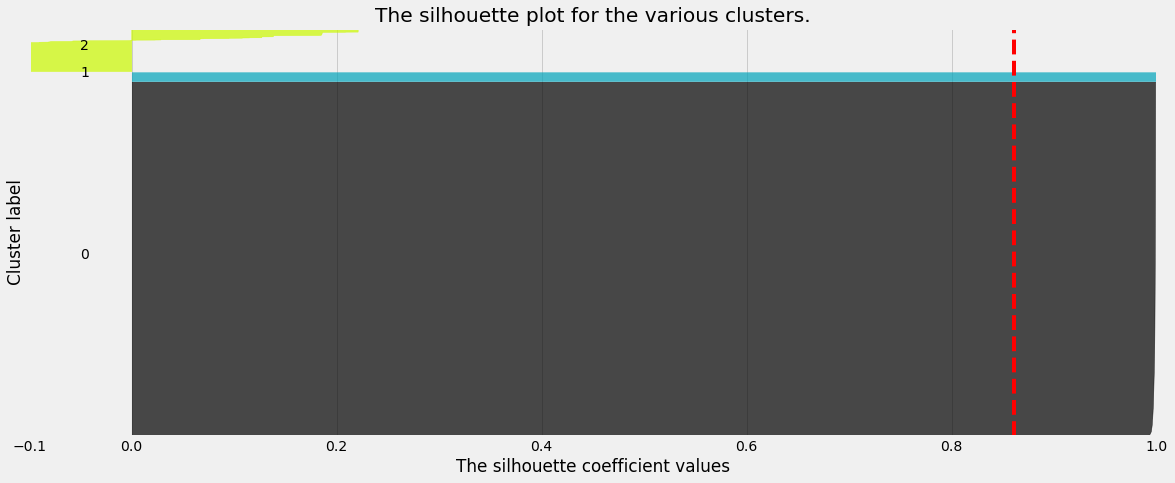

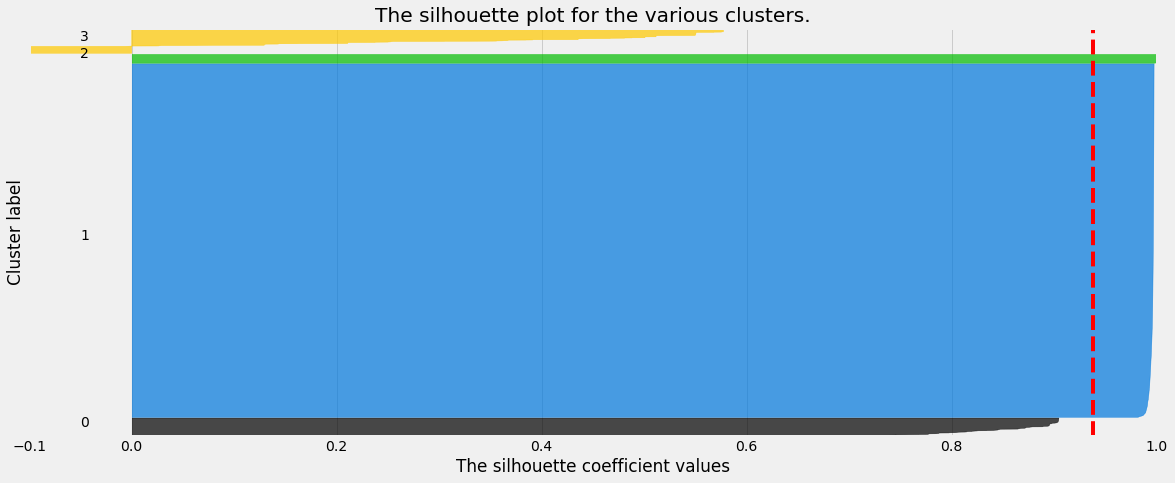

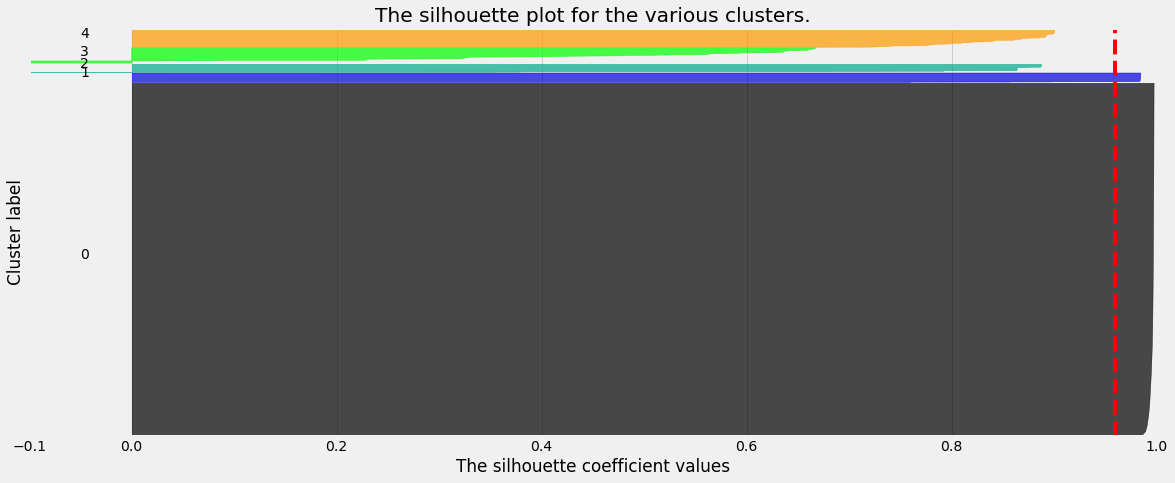

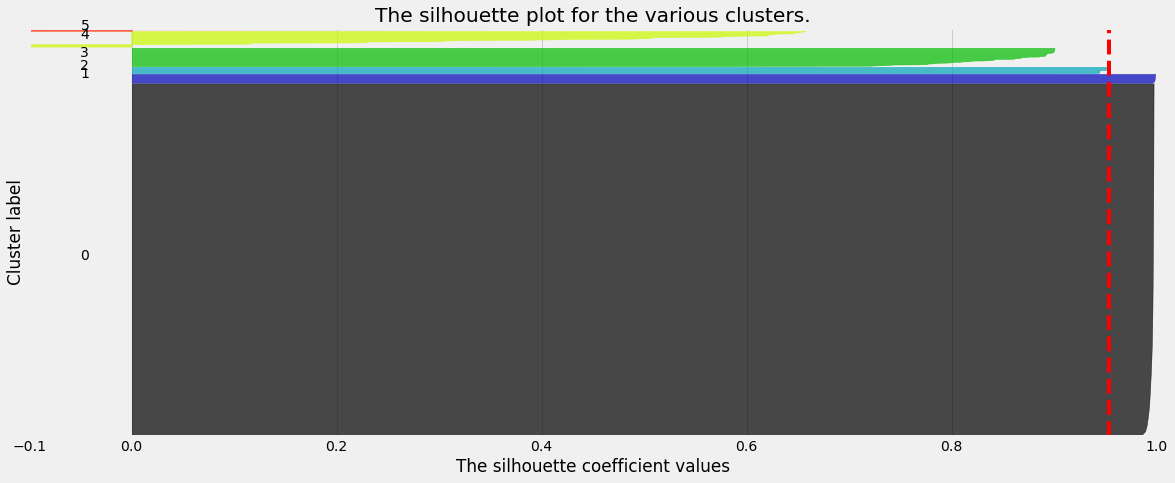

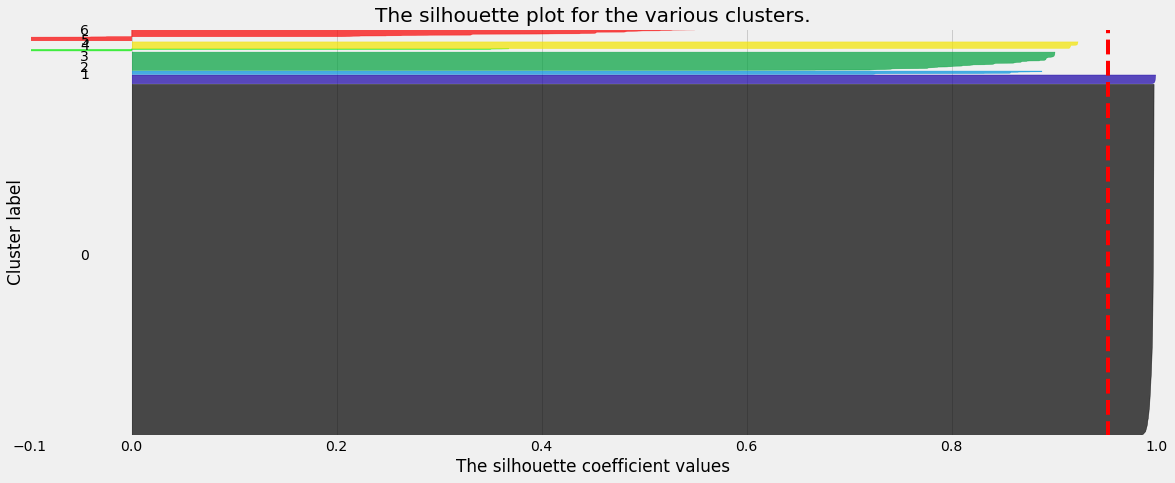

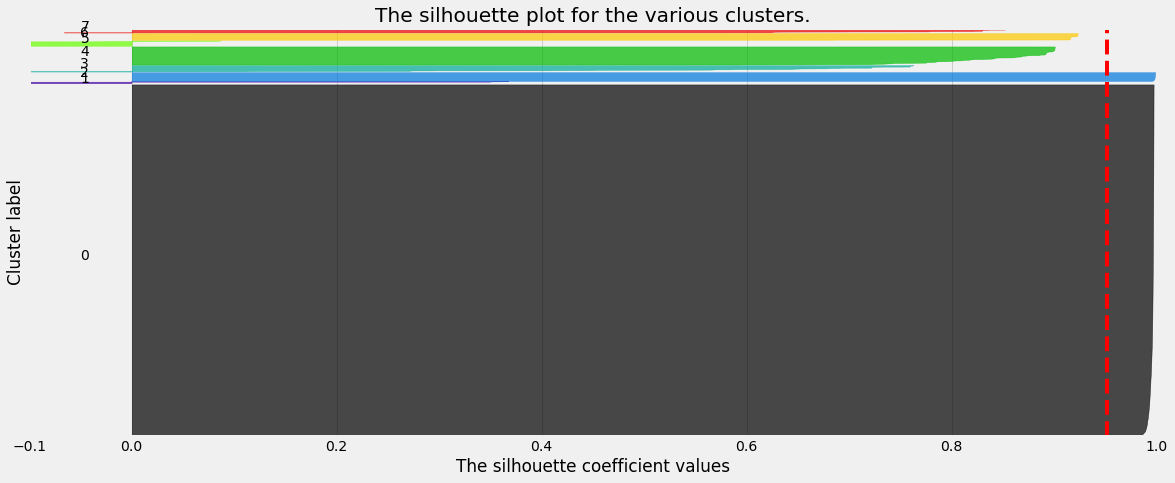

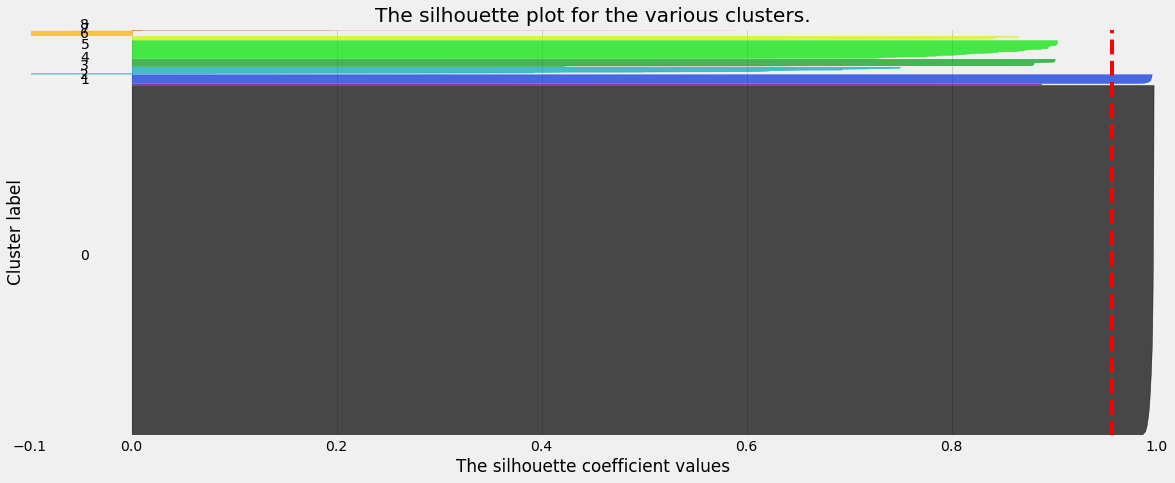

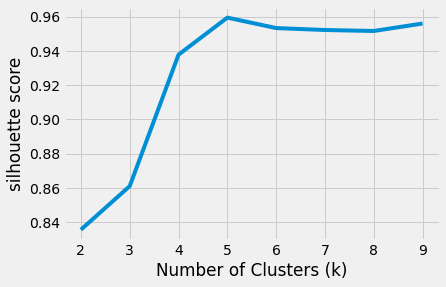

In [235]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style
range_n_clusters = range(2,10)
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, n_init=20, init_params='kmeans')
    cluster_labels = clusterer.fit_predict(rp_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rp_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rp_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [ ]:
##5 clusters for GMM

In [268]:
GMM_model = GaussianMixture(n_components=5, # this is the optimal number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=20, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=2 # for reproducibility
                        )

In [269]:
y_pred = GMM_model.fit_predict(rp_df[['pc1', 'pc2', 'pc3']])
rp_df['GMM_cluster'] = y_pred
y_pred = KMeans(n_clusters=9, random_state=0).fit_predict(rp_df[['pc1']])
rp_df['K_means_cluster'] = y_pred
rp_df.head()

,pc1,pc2,pc3,GMM_cluster,K_means_cluster
0,-5.970854,3.211595,23.379622,2,1
1,-4.702020,1.946792,19.242496,2,1
2,-4.777728,7.520837,29.315013,2,1
3,-3582.517559,1686.827327,1017.939627,1,3
4,-5.831571,-0.540026,16.946396,2,1


In [270]:
rp_df['target'] = list(X_train['approved'])

In [271]:
rp_df.groupby(['target'])['GMM_cluster'].value_counts(normalize = True)

target  GMM_cluster
0       2              0.929137
        1              0.039391
        0              0.030013
        4              0.001251
        3              0.000208
1       2              0.703496
        3              0.094881
        0              0.091760
        4              0.076155
        1              0.033708
Name: GMM_cluster, dtype: float64

In [326]:
rp_df.groupby(['GMM_cluster'])['target'].value_counts(normalize = True)

GMM_cluster  target
0            1         0.505155
             0         0.494845
1            0         0.777778
             1         0.222222
2            0         0.798209
             1         0.201791
3            1         0.993464
             0         0.006536
4            1         0.953125
             0         0.046875
Name: target, dtype: float64

In [325]:
rp_df.groupby(['K_means_cluster'])['target'].value_counts(normalize = True)

K_means_cluster  target
0                1         0.992806
                 0         0.007194
1                0         0.798571
                 1         0.201429
2                1         0.949153
                 0         0.050847
3                0         0.816327
                 1         0.183673
4                1         0.503425
                 0         0.496575
5                0         0.521127
                 1         0.478873
6                1         1.000000
7                1         0.916667
                 0         0.083333
8                0         1.000000
Name: target, dtype: float64

### LDA 

In [328]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X = X
y = X_train['approved']
# define the model
model = LinearDiscriminantAnalysis(n_components=1)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.853 (0.010)


In [190]:
X_lda = model.fit_transform(X, y)


In [191]:
model.explained_variance_ratio_

array([1.])

In [192]:
lda_df = pd.DataFrame(X_lda, columns = ['pc1'])
lda_df.head()

,pc1
0,-0.257311
1,-1.987449
2,0.235204
3,-0.278361
4,-1.430611


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


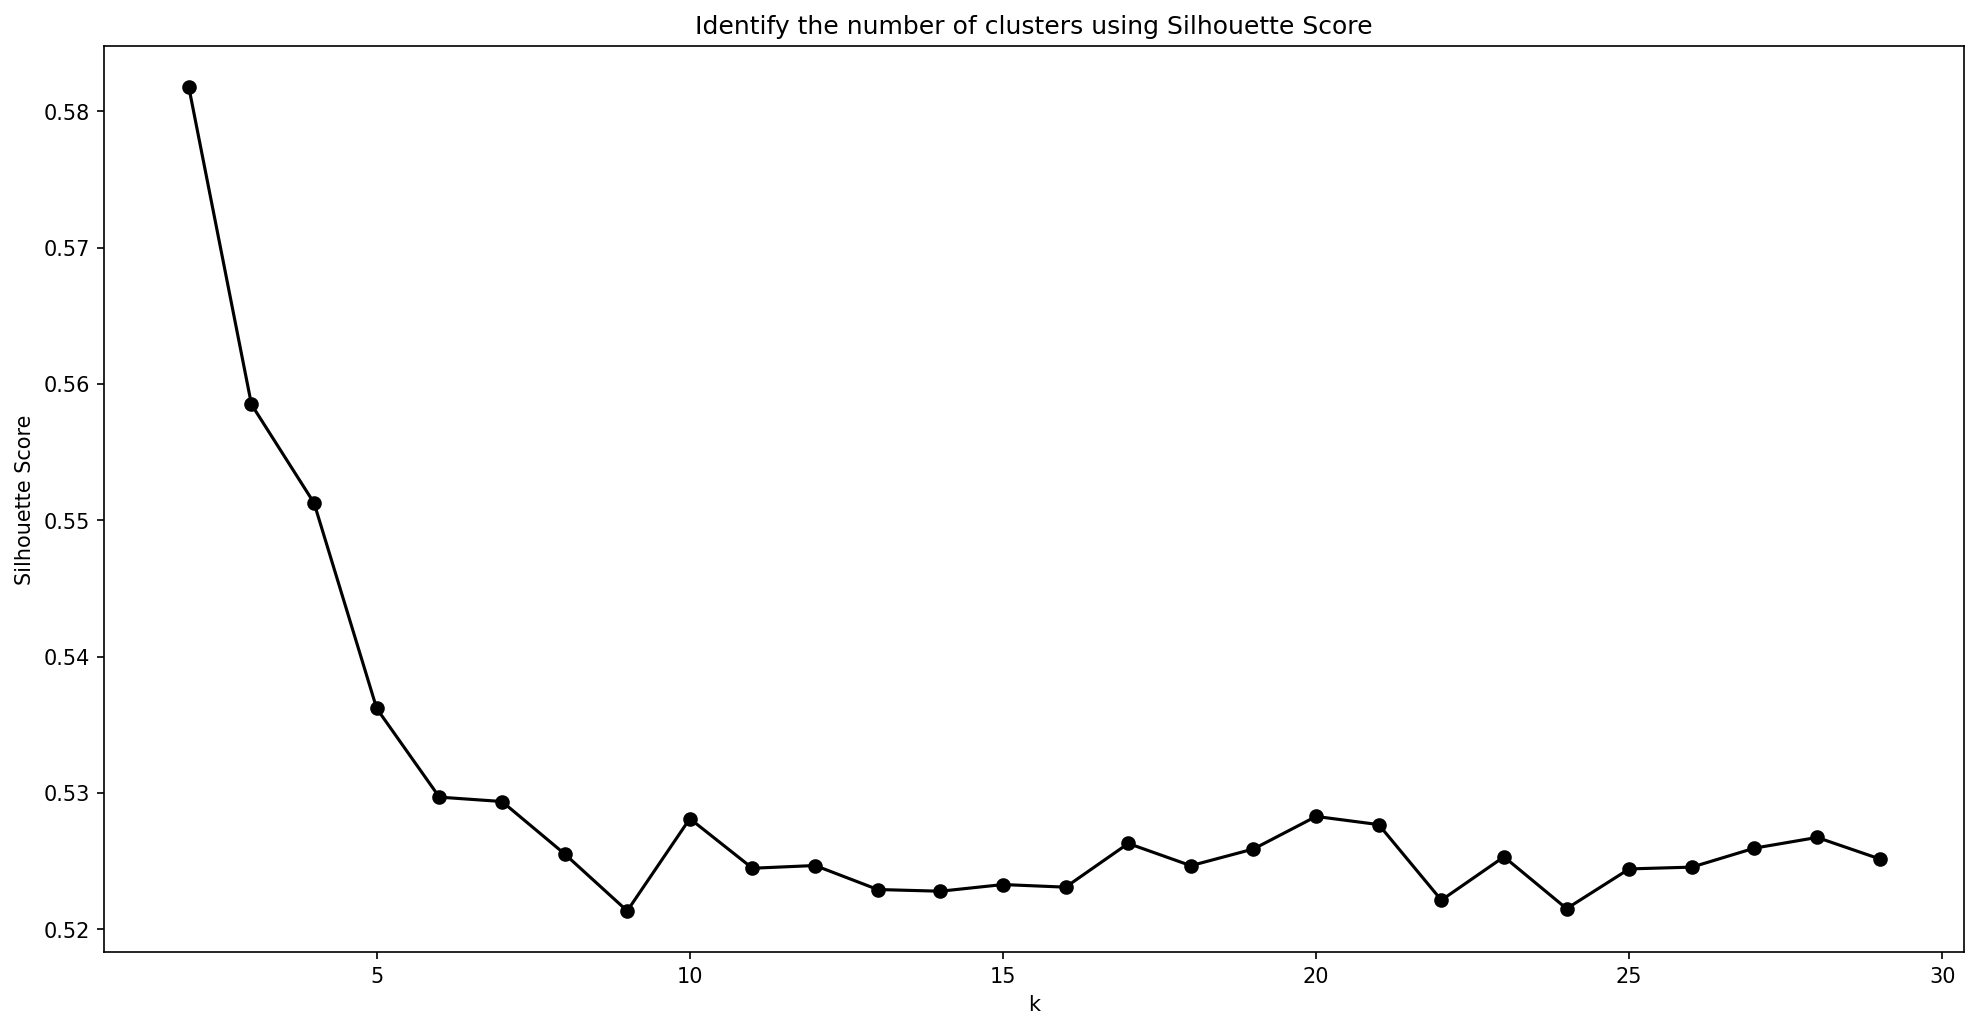

In [193]:
## K means choose k
## LDA K means: 2 clusters 
S=[]

# Range of clusters to try (2 to 10)
K=range(2,30)

for k in K:
    # Set the model and its parameters
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit the model 
    labels = model.fit_predict(lda_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(lda_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=150)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


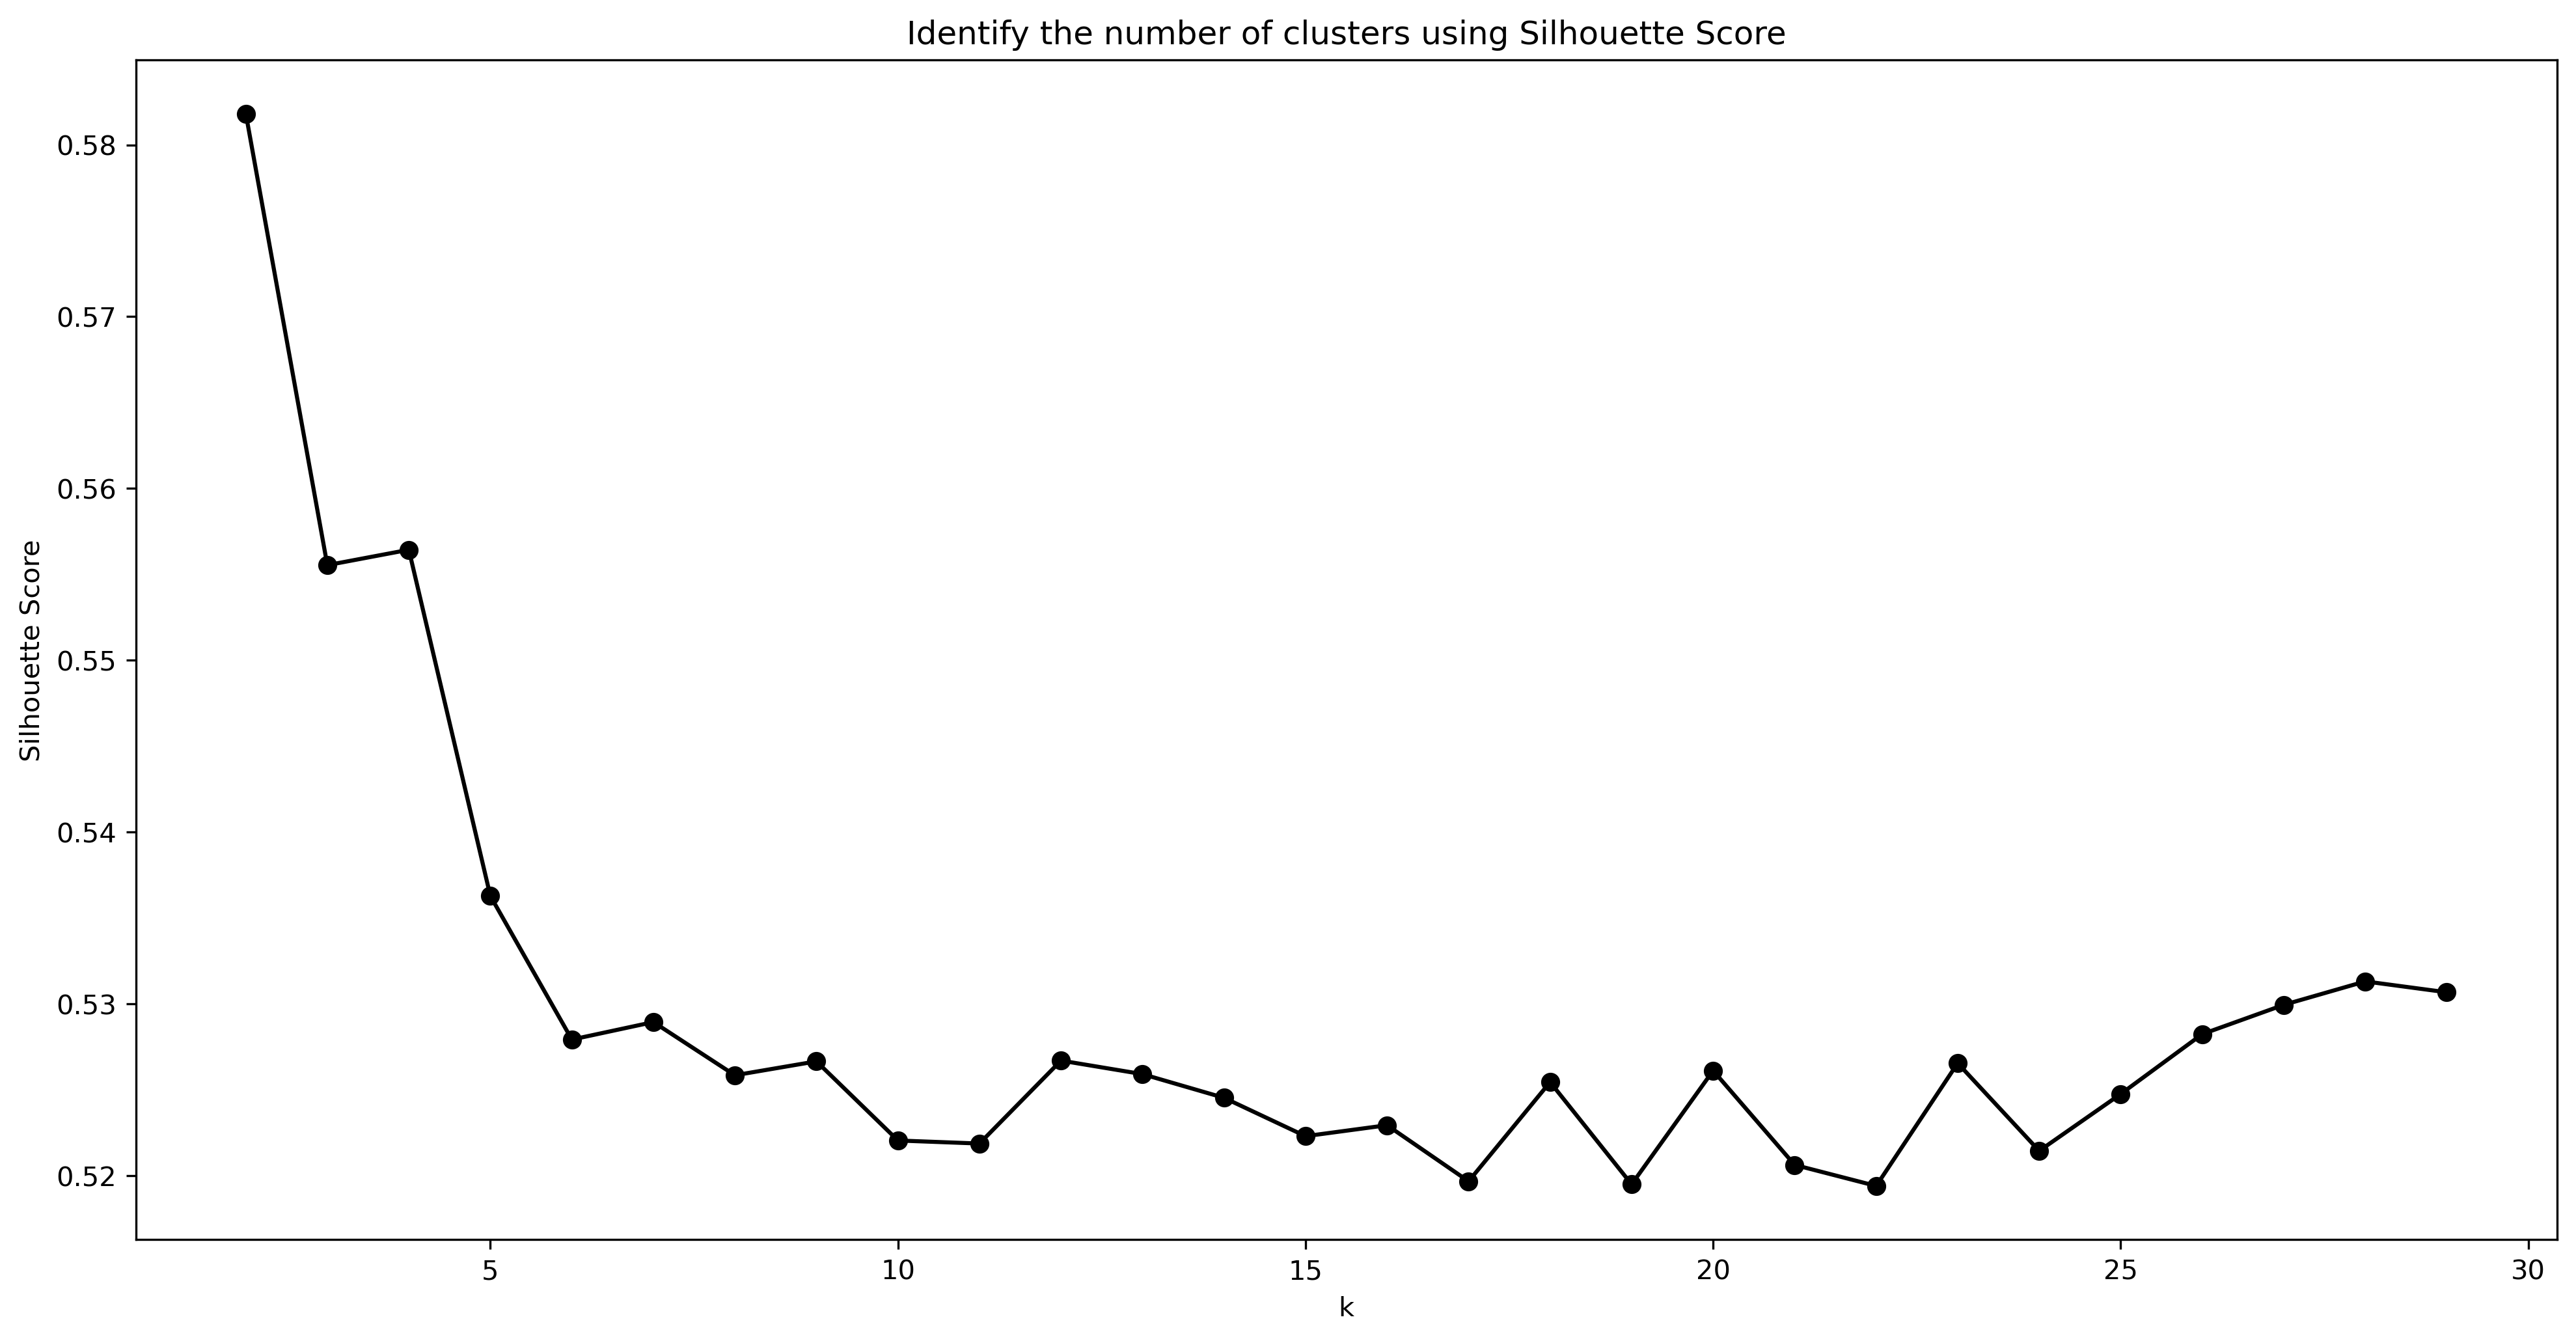

In [195]:
## GMM choose number of clusters 
## lda GMM: 2 clusters 

# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,30)

# Select data for clustering model

X = X_train.drop(['approved', 'user_id'], axis = 1)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(lda_df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(lda_df, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [199]:
GMM_model = GaussianMixture(n_components=2, # this is the optimal number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=20, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=2 # for reproducibility
                        )

y_pred = GMM_model.fit_predict(lda_df[['pc1']])
lda_df['GMM_cluster'] = y_pred
y_pred = KMeans(n_clusters=2, random_state=2).fit_predict(lda_df[['pc1']])
lda_df['K_means_cluster'] = y_pred
lda_df['target'] = list(X_train['approved'])
lda_df.head()

,pc1,GMM_cluster,K_means_cluster,target
0,-0.257311,1,0,0
1,-1.987449,1,0,0
2,0.235204,1,1,0
3,-0.278361,1,0,0
4,-1.430611,1,0,0


In [260]:
print(lda_df.groupby(['target'])['K_means_cluster'].value_counts(normalize = True))
print(lda_df.groupby(['target'])['GMM_cluster'].value_counts(normalize = True))
print('GMM did a slightly better job in predicting the target variable than K means after LDA transformation')

target  K_means_cluster
0       0                  0.763443
        1                  0.236557
1       1                  0.869538
        0                  0.130462
Name: K_means_cluster, dtype: float64
target  GMM_cluster
0       1              0.767195
        0              0.232805
1       0              0.867665
        1              0.132335
Name: GMM_cluster, dtype: float64


In [280]:
pca_df.to_csv('../Data/pca_df.csv')
ica_df.to_csv('../Data/ica_df.csv')
rp_df.to_csv('../Data/rp_df.csv')
lda_df.to_csv('../Data/lda_df.csv')